In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [44]:
df = pd.read_csv('logbook_assignment1.csv', low_memory=False)


## Question 1


In [45]:
# 1.1.1
# determine what are not propper dates
# Improper formatting/garbage
# Propper date is month/day/year
# Note this only works if we clean up the stuff df["date_feuled"] = pd.to_datetime(df["date_feuled"], format='%b %d %Y', errors='raise')

# Define a function to check if the date is valid
def is_valid_date(date_str):
    if pd.isna(date_str):
        return False
    try:
        pd.to_datetime(date_str, format='%b %d %Y', errors='raise')
        return True
        
    except (ValueError, TypeError):
        return False

# Apply the function to the 'date_fueled' column
# Creating a new column valid_date_feuled (this is the data set in memory not the actual csv file)
# this column is a binary column into trues and false

df['valid_date_fueled'] = df['date_fueled'].apply(is_valid_date)

# Calculate the percentage of invalid dates
invalid_date_percentage = (df['valid_date_fueled'].value_counts(normalize=True) * 100)[False]

print(f"Percentage of invalid 'date_fueled' entries: {invalid_date_percentage:.2f}%")


Percentage of invalid 'date_fueled' entries: 11.68%


In [46]:
# 1.1.2
df['date_fueled'] = df.apply(lambda row: row['date_captured'] if not is_valid_date(row['date_fueled']) and is_valid_date(row['date_captured']) else row['date_fueled'], axis=1)
df.head(11)


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,Apr 7 2022,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,Nov 7 2012,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,Sep 22 2012,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...,True
3,May 4 2019,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,True
5,Oct 23 2021,Oct 23 2021,"147,567",3.413,$3.739,$12.76,29.0,NaN,https://www.somewebsite.com/volkswagen/passat/...,True
6,Nov 20 2021,Dec 12 2021,"105,929",9.044,$4.639,$41.96,29.5,NaN,https://www.somewebsite.com/mazda/3_sport/2010...,True
7,Jan 20 2022,Jan 20 2022,"59,475",14.962,$2.929,$43.82,27.3,NaN,https://www.somewebsite.com/subaru/forester/20...,True
8,Apr 16 2018,Apr 16 2018,"137,562",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/kianival/2009/789684,False
9,Nov 29 2020,Nov 29 2020,"99,296",2.710,$1.999,$5.42,0.0,NaN,https://www.somewebsite.com/lexus/rx350/2012/8...,False


In [47]:
#1.1.3
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
df['date_captured'] = pd.to_datetime(df['date_captured'], errors='coerce')



print(df.dtypes)
df.head(11)

date_fueled          datetime64[ns]
date_captured        datetime64[ns]
odometer                     object
gallons                      object
cost_per_gallon              object
total_spent                  object
mpg                          object
miles                        object
user_url                     object
valid_date_fueled              bool
dtype: object


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,2022-04-07,2022-04-07,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,2012-11-07,2016-08-30,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,2012-09-22,2012-09-28,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...,True
3,2019-05-04,2019-05-04,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,True
5,2021-10-23,2021-10-23,"147,567",3.413,$3.739,$12.76,29.0,NaN,https://www.somewebsite.com/volkswagen/passat/...,True
6,2021-11-20,2021-12-12,"105,929",9.044,$4.639,$41.96,29.5,NaN,https://www.somewebsite.com/mazda/3_sport/2010...,True
7,2022-01-20,2022-01-20,"59,475",14.962,$2.929,$43.82,27.3,NaN,https://www.somewebsite.com/subaru/forester/20...,True
8,2018-04-16,2018-04-16,"137,562",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/kianival/2009/789684,False
9,2020-11-29,2020-11-29,"99,296",2.710,$1.999,$5.42,0.0,NaN,https://www.somewebsite.com/lexus/rx350/2012/8...,False


In [48]:
#1.1.4
# NOTE do we change both columns, and when they say remove do they mean "NaT" or remove the row?

df['date_fueled'] = df.apply(lambda row: pd.NaT if (row['date_fueled'].year < 2005 or row['date_fueled']>pd.Timestamp.now()) else row['date_fueled'], axis=1)
df['date_captured'] = df.apply(lambda row: pd.NaT if (row['date_captured'].year < 2005 or row['date_captured']>pd.Timestamp.now()) else row['date_captured'], axis=1)

df.head()


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,2022-04-07,2022-04-07,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,2012-11-07,2016-08-30,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,2012-09-22,2012-09-28,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...,True
3,2019-05-04,2019-05-04,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,True


C:\Users\Tumi\AppData\Local\Temp\ipykernel_16332\398176882.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_graphing, x='year', palette='Reds')


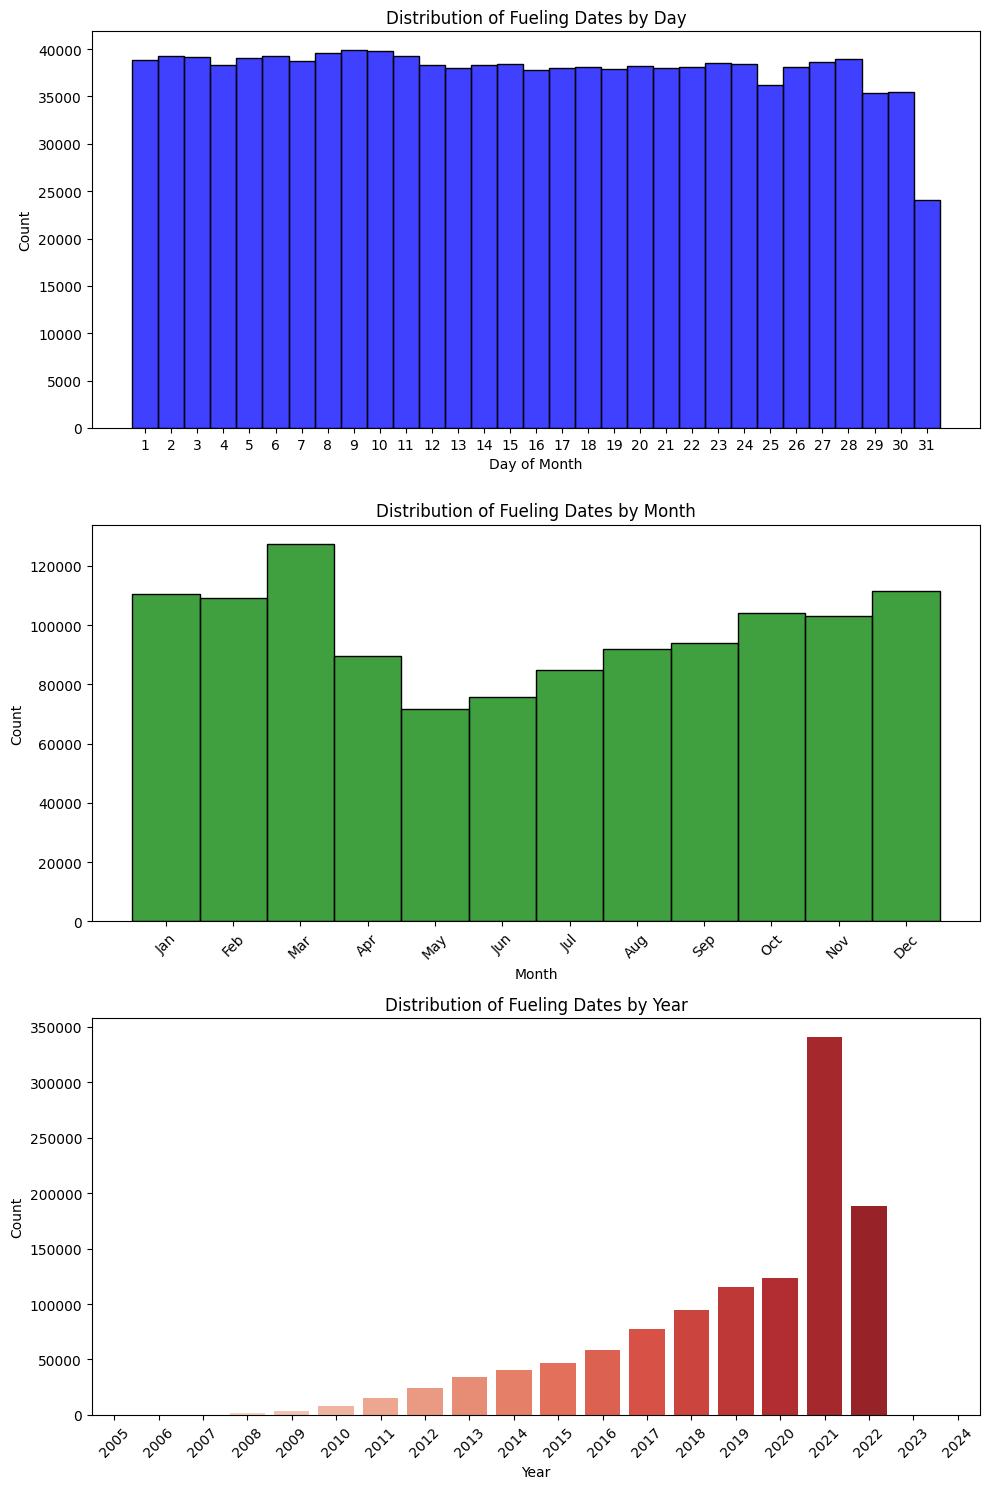

In [49]:
#1.1.5

# Sample DataFrame creation for demonstration purposes
# df = pd.read_csv('your_data.csv')  # Uncomment and use your actual data

# Ensure 'date_fueled' is in datetime format
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')

# Drop rows where 'date_fueled' is NaT (not-a-time)
df_graphing = df.copy()
df_graphing = df_graphing.dropna(subset=['date_fueled'])

# Extract day, month, and year
df_graphing['day'] = df_graphing['date_fueled'].dt.day
df_graphing['month'] = df_graphing['date_fueled'].dt.month
df_graphing['year'] = df_graphing['date_fueled'].dt.year

# Plot settings
plt.figure(figsize=(10, 15))

# Plot for day
plt.subplot(3, 1, 1)
sns.histplot(df_graphing['day'], bins=31, discrete=True, kde=False, color='blue')
plt.title('Distribution of Fueling Dates by Day')
plt.xlabel('Day of Month')
plt.ylabel('Count')
plt.xticks(range(1, 32))  # Set x-ticks to show all days of the month

# Plot for month
plt.subplot(3, 1, 2)
sns.histplot(df_graphing['month'], bins=12, discrete=True, kde=False, color='green')
plt.title('Distribution of Fueling Dates by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Plot for year
plt.subplot(3, 1, 3)
sns.countplot(data=df_graphing, x='year', palette='Reds')
plt.title('Distribution of Fueling Dates by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [50]:
#1.2.1


missing_gallons = df['gallons'].isna().mean() * 100
missing_miles = df['miles'].isna().mean() * 100
missing_odometer = df['odometer'].isna().mean() * 100

# Print out the percentages
print(f"Percentage of missing values in 'gallons': {missing_gallons:.2f}%")
print(f"Percentage of missing values in 'miles': {missing_miles:.2f}%")
print(f"Percentage of missing values in 'odometer': {missing_odometer:.2f}%")


Percentage of missing values in 'gallons': 6.32%
Percentage of missing values in 'miles': 87.55%
Percentage of missing values in 'odometer': 12.70%


In [51]:
#1.2.3

def to_float(x):
    try:
        # Remove any non-numeric characters (except for the decimal point)
        cleaned = x.replace(',', '')
        return float(cleaned)
    except:
        return None  # Return None if conversion fail
    
df['miles'] = df['miles'].apply(lambda x: to_float(x) if isinstance(x, str) else x)
df['odometer'] = df['odometer'].apply(lambda x: to_float(x) if isinstance(x, str) else x)
df['gallons'] = df['gallons'].apply(lambda x: to_float(x) if isinstance(x, str) else x)


df.head(10)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...,True
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,True
5,2021-10-23,2021-10-23,147567.0,3.413,$3.739,$12.76,29.0,NaN,https://www.somewebsite.com/volkswagen/passat/...,True
6,2021-11-20,2021-12-12,105929.0,9.044,$4.639,$41.96,29.5,NaN,https://www.somewebsite.com/mazda/3_sport/2010...,True
7,2022-01-20,2022-01-20,59475.0,14.962,$2.929,$43.82,27.3,NaN,https://www.somewebsite.com/subaru/forester/20...,True
8,2018-04-16,2018-04-16,137562.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/kianival/2009/789684,False
9,2020-11-29,2020-11-29,99296.0,2.710,$1.999,$5.42,0.0,NaN,https://www.somewebsite.com/lexus/rx350/2012/8...,False


In [52]:
#1.2.2
df['mpg'] = df['mpg'].apply(lambda x: to_float(x) if isinstance(x, str) else x)


def fix_measurements(row):
    if(pd.isna(row['gallons'])):
        
        row['gallons'] = (1/row['mpg']) * row['miles']
        
    if(pd.isna(row['miles'])):
        
        row['miles'] = row['mpg']*row['gallons']
        
    if(pd.isna(row['mpg'])):
        
        row['mpg'] = row['miles']/ row['gallons']
    return row
            
df = df.apply(lambda row: fix_measurements(row),  axis=1)

df.head(100)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,True
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,True
...,...,...,...,...,...,...,...,...,...,...
95,2014-05-14,2014-05-14,NaN,12.622,£5.03,£63.50,25.2,318.6000,https://www.somewebsite.com/alfa_romeo/155/199...,False
96,2022-01-24,2022-01-24,NaN,13.181,$3.579,$47.17,10.8,142.1000,https://www.somewebsite.com/mazda/rx-7/1990/11...,True
97,2022-02-14,2022-02-14,26753.0,17.370,$3.339,$58.00,15.9,276.1830,https://www.somewebsite.com/volvo/xc90/2019/94...,True
98,2022-04-05,2022-04-05,78429.0,10.567,R73.85,R780.40,0.0,0.0000,https://www.somewebsite.com/ford/transit_conne...,True


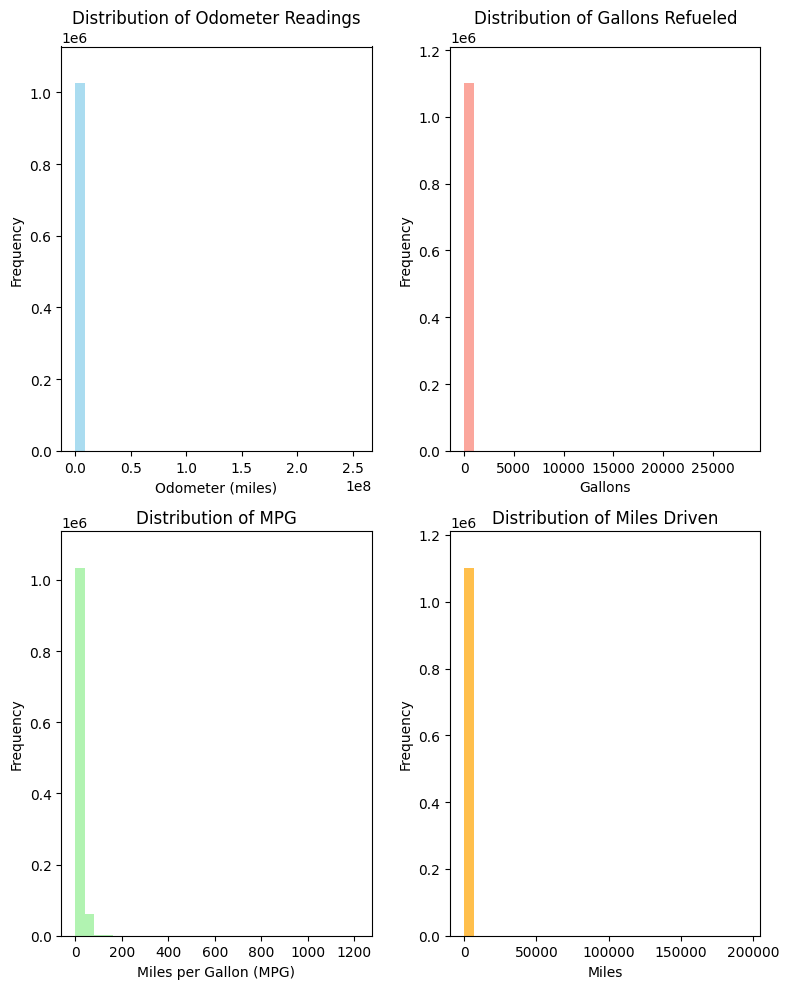

In [53]:
# 1.2.4

# Set up the plotting environment
# Set up the plotting environment
plt.figure(figsize=(8, 10))

df_temp = df.copy()

# Plot distribution for 'odometer', ignoring 0 values
plt.subplot(2, 2, 1)
filtered_odometer = df_temp['odometer'].dropna()
# filtered_odometer = filtered_odometer[filtered_odometer > 0]
n, bins, patches = plt.hist(filtered_odometer, bins=30, color='skyblue', alpha=0.7)
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer (miles)')
plt.ylabel('Frequency')
plt.ylim(0, n.max() * 1.1)  # Set y-axis just higher than the max value

# Plot distribution for 'gallons', ignoring 0 values
plt.subplot(2, 2, 2)
filtered_gallons = df_temp['gallons'].dropna()
# filtered_gallons = filtered_gallons[filtered_gallons > 0]
n, bins, patches = plt.hist(filtered_gallons, bins=30, color='salmon', alpha=0.7)
plt.title('Distribution of Gallons Refueled')
plt.xlabel('Gallons')
plt.ylabel('Frequency')
plt.ylim(0, n.max() * 1.1)  # Set y-axis just higher than the max value

# Plot distribution for 'mpg', ignoring 0 values
plt.subplot(2, 2, 3)
filtered_mpg = df_temp['mpg'].dropna()
# filtered_mpg = filtered_mpg[filtered_mpg > 0]
n, bins, patches = plt.hist(filtered_mpg, bins=30, color='lightgreen', alpha=0.7)
plt.title('Distribution of MPG')
plt.xlabel('Miles per Gallon (MPG)')
plt.ylabel('Frequency')
plt.ylim(0, n.max() * 1.1)  # Set y-axis just higher than the max value

# Plot distribution for 'miles', ignoring 0 values
plt.subplot(2, 2, 4)
filtered_miles = df_temp['miles'].dropna()
# filtered_miles = filtered_miles[filtered_miles > 0]
n, bins, patches = plt.hist(filtered_miles, bins=30, color='orange', alpha=0.7)
plt.title('Distribution of Miles Driven')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.ylim(0, n.max() * 1.1)  # Set y-axis just higher than the max value

# Adjust layout for better fit
plt.tight_layout()
plt.show()

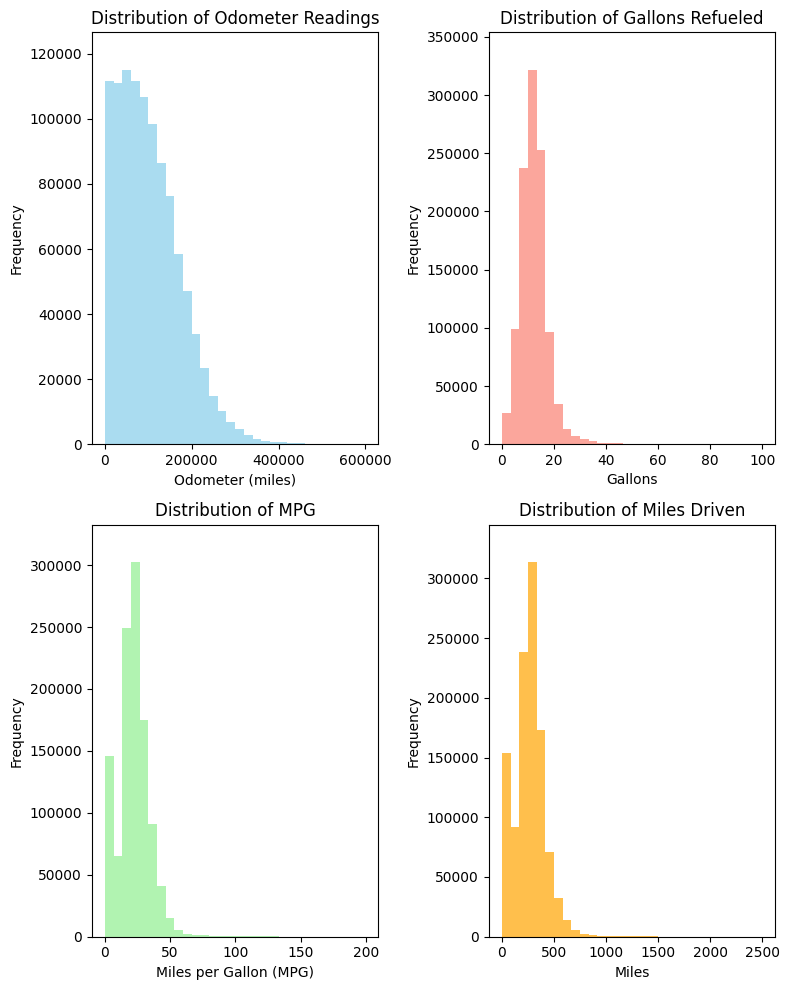

In [54]:
# 1.2.4 showing without outliers making data unreadable

# Set up the plotting environment
# Set up the plotting environment
plt.figure(figsize=(8, 10))

df_temp = df.copy()

# Plot distribution for 'odometer', ignoring 0 values
plt.subplot(2, 2, 1)
filtered_odometer = df_temp['odometer'].dropna().astype(float)
filtered_odometer = filtered_odometer[filtered_odometer < 600000]
n, bins, patches = plt.hist(filtered_odometer, bins=30, color='skyblue', alpha=0.7)
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer (miles)')
plt.ylabel('Frequency')
plt.ylim(0, n.max() * 1.1)  # Set y-axis just higher than the max value

# Plot distribution for 'gallons', ignoring 0 values
plt.subplot(2, 2, 2)
filtered_gallons = df_temp['gallons'].dropna().astype(float)
filtered_gallons = filtered_gallons[filtered_gallons < 100]
n, bins, patches = plt.hist(filtered_gallons, bins=30, color='salmon', alpha=0.7)
plt.title('Distribution of Gallons Refueled')
plt.xlabel('Gallons')
plt.ylabel('Frequency')
plt.ylim(0, n.max() * 1.1)  # Set y-axis just higher than the max value

# Plot distribution for 'mpg', ignoring 0 values
plt.subplot(2, 2, 3)
filtered_mpg = df_temp['mpg'].dropna().astype(float)
filtered_mpg = filtered_mpg[filtered_mpg < 200]
n, bins, patches = plt.hist(filtered_mpg, bins=30, color='lightgreen', alpha=0.7)
plt.title('Distribution of MPG')
plt.xlabel('Miles per Gallon (MPG)')
plt.ylabel('Frequency')
plt.ylim(0, n.max() * 1.1)  # Set y-axis just higher than the max value

# Plot distribution for 'miles', ignoring 0 values
plt.subplot(2, 2, 4)
filtered_miles = df_temp['miles'].dropna().astype(float)
filtered_miles = filtered_miles[filtered_miles < 2500]
n, bins, patches = plt.hist(filtered_miles, bins=30, color='orange', alpha=0.7)
plt.title('Distribution of Miles Driven')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.ylim(0, n.max() * 1.1)  # Set y-axis just higher than the max value

# Adjust layout for better fit
plt.tight_layout()
plt.show()

In [55]:
#1.2.5

# Ensure columns are floats
# df['odometer'] = df['odometer'].astype(float)
# df['gallons'] = df['gallons'].astype(float)
# df['mpg'] = df['mpg'].astype(float)
# df['miles'] = df['miles'].astype(float)

# Compute descriptive statistics
statistics = pd.DataFrame()

for column in ['odometer', 'gallons', 'mpg', 'miles']:
    stats = df[column].describe()
    mode = df[column].mode()[0]  # Get the most frequent value
    statistics[column] = pd.Series({
        'mean': stats['mean'],
        'std': stats['std'],
        'min': stats['min'],
        '25%': stats['25%'],
        '50%': stats['50%'],
        '75%': stats['75%'],
        'max': stats['max'],
        'most_frequent': mode
    })

print(statistics)
# keep in mind talk about out liers

                   odometer       gallons          mpg          miles
mean           1.039960e+05     12.801068    22.163322     269.489628
std            3.405252e+05     74.472096    15.743052     725.709249
min            0.000000e+00      0.000000     0.000000       0.000000
25%            4.592000e+04      8.990000    15.600000     181.400000
50%            9.188200e+04     11.954000    21.800000     267.058000
75%            1.469220e+05     14.939000    28.500000     342.769250
max            2.543621e+08  28380.000000  1214.300000  195321.200000
most_frequent  1.000000e+00     10.567000     0.000000       0.000000


## Question 2


In [56]:
#2.1 currency column
def get_symbol_value(price):
    if isinstance(price, str):
        pattern =  r'(\D*)[\d\,\.]+(\D*)'
        unit = re.match(pattern, price.strip()).groups()
        numeric_value = re.findall(r'[\d\,\.]+', price.strip())[0]
        return (unit[0] or unit[1]).strip(), numeric_value.lstrip('.')
    return pd.NA, 0.0

df['currency'] = df['total_spent'].apply(lambda row: get_symbol_value(row)[0])

In [57]:
#2.2 float value total spend and cost per gallon
df['total_spent_float'] = df['total_spent'].apply(lambda row: get_symbol_value(row)[1])
df['total_spent_float'] = df['total_spent_float'].apply(lambda x: to_float(x) if isinstance(x, str) else x)

df['cost_per_gallon_float'] = df['cost_per_gallon'].apply(lambda row: get_symbol_value(row)[1])
df['cost_per_gallon_float'] = df['cost_per_gallon_float'].apply(lambda x: to_float(x) if isinstance(x, str) else x)

In [58]:
#2.3 car make, model, year, user id
def get_user_info(url):
    pattern = r'https://www\.somewebsite\.com/([^/]+)/([^/]+)/(\d+)/(\d+)'
    match = re.match(pattern, url.strip())
    if match:
        return match.groups()
    
    pattern = r'https://www\.somewebsite\.com/([^/]+)/([^/]+)/(\d+)'
    match = re.match(pattern, url.strip())
    if match:
        if len(match[2]) == 4:
            return match.group(1), match.group(2), match.group(3), pd.NA
        else:
            return match.group(1), match.group(2), pd.NA, match.group(3)
    
    pattern = r'https://www\.somewebsite\.com/([^/]+)/([^/]+)'
    match = re.match(pattern, url.strip())
    if match:
        return match.group(1), match.group(2), pd.NA, pd.NA

df[['car_make', 'model', 'year', 'user_id']] = pd.DataFrame(df['user_url'].apply(get_user_info).tolist(), index=df.index)

In [59]:
#part 2 q2
#litres filled - using UK gallons
def to_litre(x):
    try:
        return float(x) * 4.54609
    except (ValueError, TypeError):
        return 0.0

df['litres_filled'] = df['gallons'].apply(to_litre)

In [60]:
#km driven
def to_km(x):
    try:
        return float(x) * 1.60934
    except(ValueError, TypeError):
        return 0.0

df['km_driven'] = df['miles'].apply(to_km)

In [61]:
#litres per 100km
df['litres_per_100km'] = df.apply(lambda row: (row['litres_filled'] / row['km_driven']) * 100 if row['km_driven'] != 0 else 0.0, axis=1)

print(df[['litres_filled', 'km_driven', 'litres_per_100km']])

         litres_filled   km_driven  litres_per_100km
0                  NaN         NaN               NaN
1            55.098611  616.364345          8.939292
2            36.327805  366.516724          9.911636
3            48.074902  796.478459          6.035932
4            52.966495  393.322696         13.466422
...                ...         ...               ...
1174865      59.308290  539.583056         10.991503
1174866      57.448939  406.744592         14.124082
1174867      45.469992  458.753632          9.911636
1174868      47.702122  616.368369          7.739223
1174869      78.874662    0.000000          0.000000

[1174870 rows x 3 columns]


## Question 3


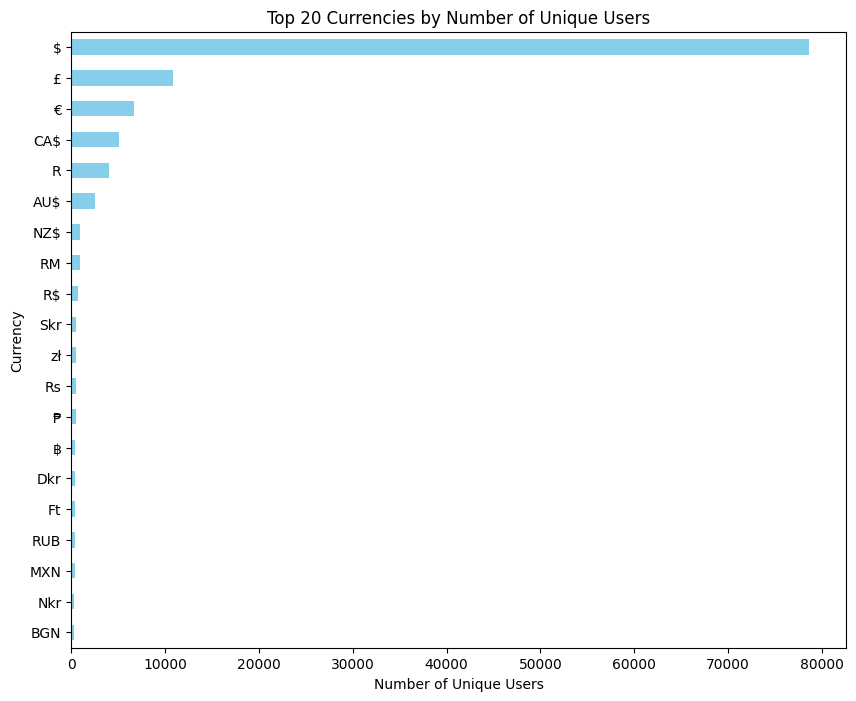

In [63]:
#Q3.1

df_temp = df.copy()
# Remove NaN values from the 'currency' column (surprisingly a lot of nans)

unique_users_per_currency = df_temp.groupby('currency')['user_id'].nunique()
unique_users_per_currency = unique_users_per_currency.sort_values(ascending=False)
top_currencies = unique_users_per_currency.head(20)

# Plotting the results
top_currencies.plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.title('Top 20 Currencies by Number of Unique Users')
plt.xlabel('Number of Unique Users')
plt.ylabel('Currency')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()

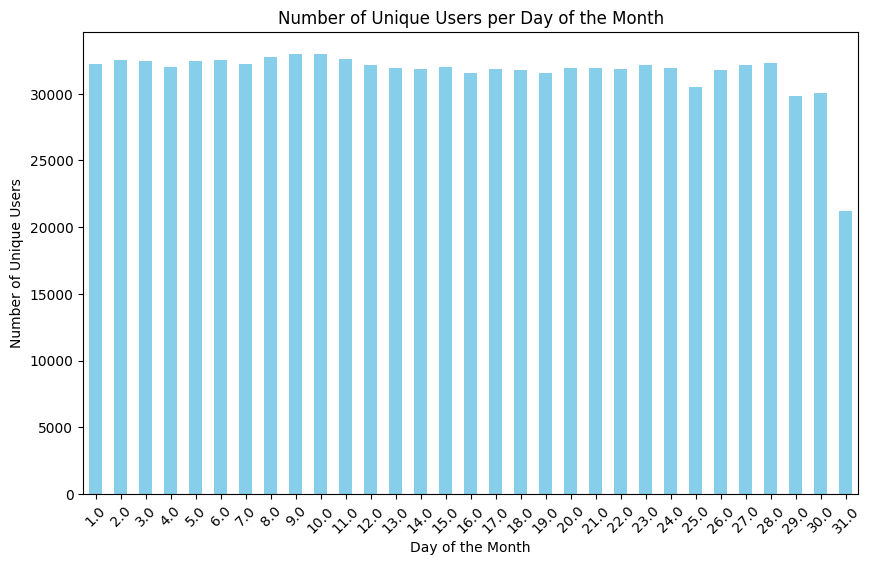

In [64]:
#3.2 

# Step 1: Extract the day of the month from 'date_fueled'
df['day_of_month'] = df['date_fueled'].dt.day

# Step 2: Group by 'day_of_month' and count unique 'user_id's
unique_users_per_day = df.groupby('day_of_month')['user_id'].nunique()

# Step 3: Sort the days of the month to ensure the plot is in the correct order
unique_users_per_day = unique_users_per_day.sort_index()

# Step 4: Plot the results as a bar plot
unique_users_per_day.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Unique Users per Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Unique Users')
plt.xticks(rotation=45)
plt.show()

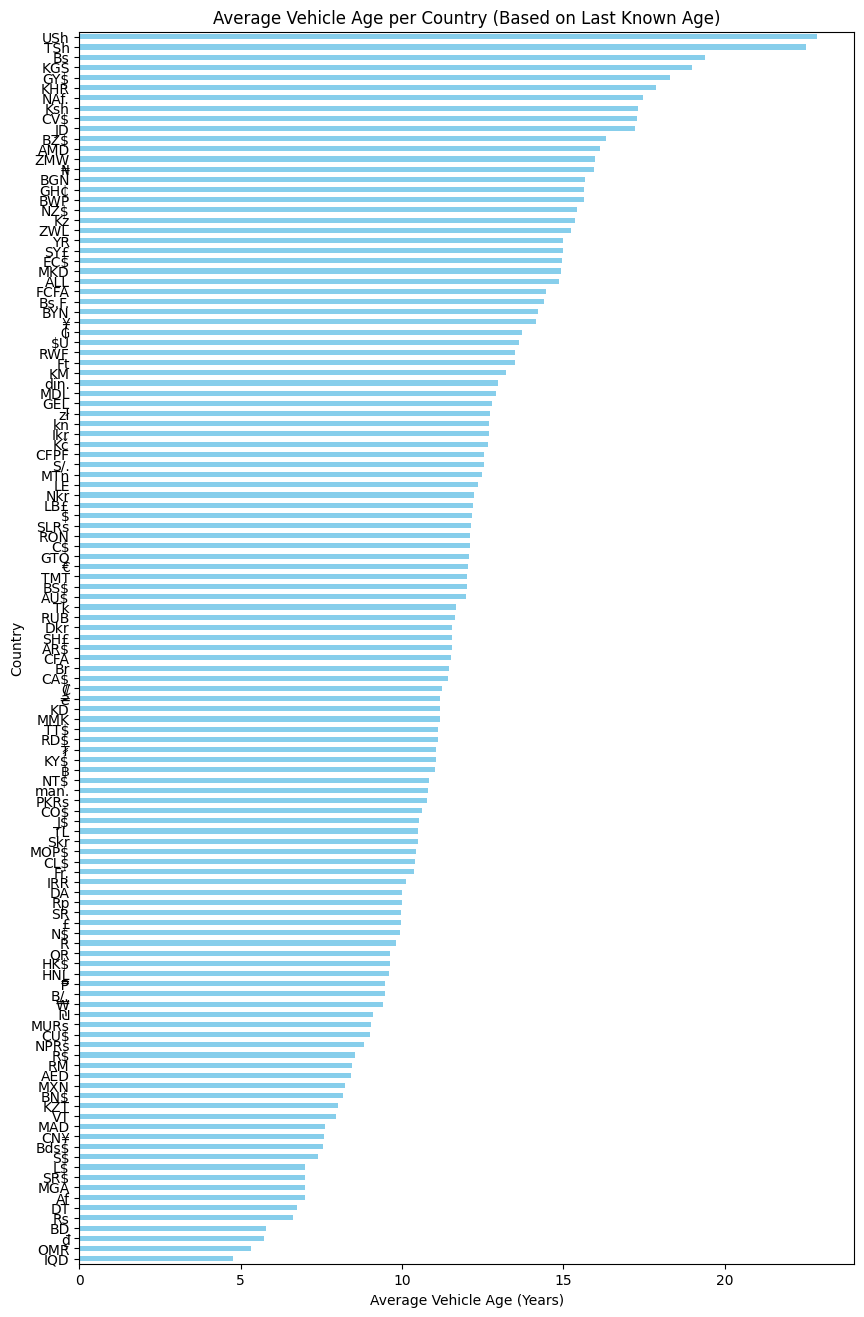

In [65]:
#3.3
# Step 1: Filter for the last known vehicle age for each user
df_temp = df.copy()

df_filtered = df_temp.dropna(subset=['user_id', 'date_fueled'])

df_latest_age = df_filtered.loc[df_filtered.groupby('user_id')['date_fueled'].idxmax()]


vehicle_age_mapping = df_latest_age.set_index('user_id')['date_fueled']
df_temp['vehicle_age'] = df_temp['user_id'].map(vehicle_age_mapping)
# Step 2: Calculate the average vehicle age per country

df_temp['vehicle_age'] = df_temp['vehicle_age'].dt.year

# Convert 'year' to datetime
df_temp['year'] = pd.to_numeric(df_temp['year'])

# Perform the subtraction
df_temp['vehicle_age'] = df_temp['vehicle_age'] - df_temp['year']

df_filtered = df_temp.dropna(subset=['currency', 'vehicle_age'])

average_age_per_country = df_filtered.groupby('currency')['vehicle_age'].mean().sort_values()
df['vehicle_age'] = df_temp['vehicle_age']
# Step 3: Plot the average vehicle age per country
plt.figure(figsize=(10, 16))
average_age_per_country.plot(kind='barh', color='skyblue')
plt.title('Average Vehicle Age per Country (Based on Last Known Age)')
plt.xlabel('Average Vehicle Age (Years)')
plt.ylabel('Country')
plt.show()

# Question 4 #

### 4.1 ###


In [66]:

# Question 4.1
# 4.1.1 Identify the top 5 currencies by number of transactions

def replace_negatives(df):
    for col in df.columns:
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].apply(lambda x: x if x >= 0 else np.nan)
    return df
df = replace_negatives(df)
df = df.dropna()

filtered_df = df.dropna().copy()
currency_counts = filtered_df['currency'].value_counts()
print(currency_counts)

top_5_currencies = currency_counts.head(5)
print(top_5_currencies)
top_5_currencies = filtered_df['currency'].value_counts().head(5).index



currency
$      660793
£       58343
€       51408
CA$     33286
R       31398
        ...  
KGS         9
L$          9
MAD         9
YR          4
IQD         4
Name: count, Length: 120, dtype: int64
currency
$      660793
£       58343
€       51408
CA$     33286
R       31398
Name: count, dtype: int64


In [67]:
print(df.columns.tolist())
df = df.drop(columns=['cost_per_gallon','total_spent','valid_date_fueled','day_of_month'])
print(df.columns.tolist())
# Delete : day of month

['date_fueled', 'date_captured', 'odometer', 'gallons', 'cost_per_gallon', 'total_spent', 'mpg', 'miles', 'user_url', 'valid_date_fueled', 'currency', 'total_spent_float', 'cost_per_gallon_float', 'car_make', 'model', 'year', 'user_id', 'litres_filled', 'km_driven', 'litres_per_100km', 'day_of_month', 'vehicle_age']
['date_fueled', 'date_captured', 'odometer', 'gallons', 'mpg', 'miles', 'user_url', 'currency', 'total_spent_float', 'cost_per_gallon_float', 'car_make', 'model', 'year', 'user_id', 'litres_filled', 'km_driven', 'litres_per_100km', 'vehicle_age']


Before isoforest 835228


c:\Users\Tumi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
c:\Users\Tumi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
c:\Users\Tumi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
c:\Users\Tumi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
c:\Users\Tumi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
c:\Users\Tumi\A

After isoforest 693199
Before iqr 693199
After iqr 612168
before mismatch clean 612168
after mismatch clean 608567
Count =  398634


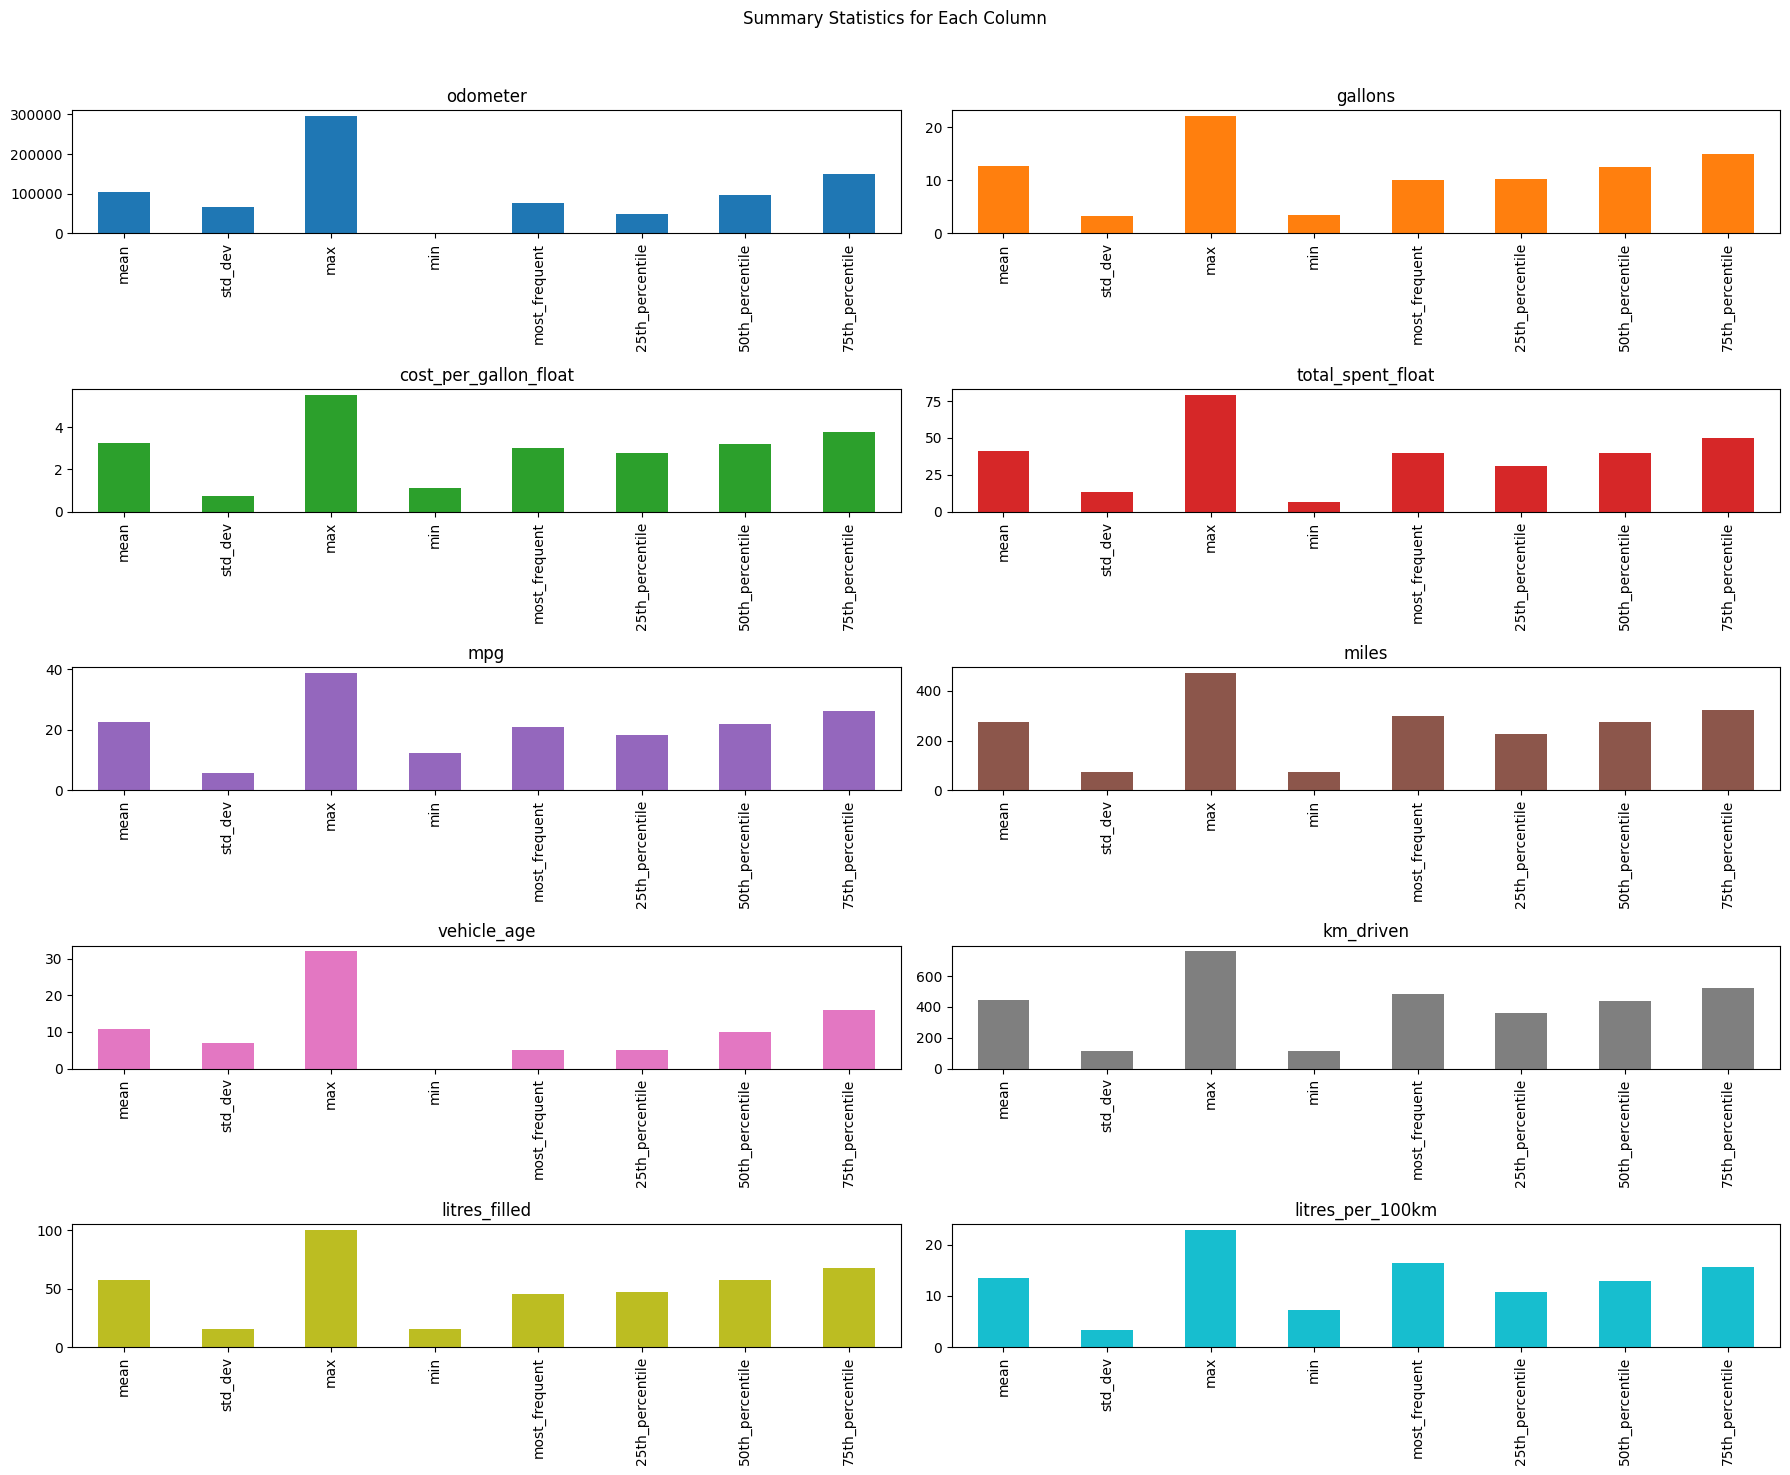

Count =  35684


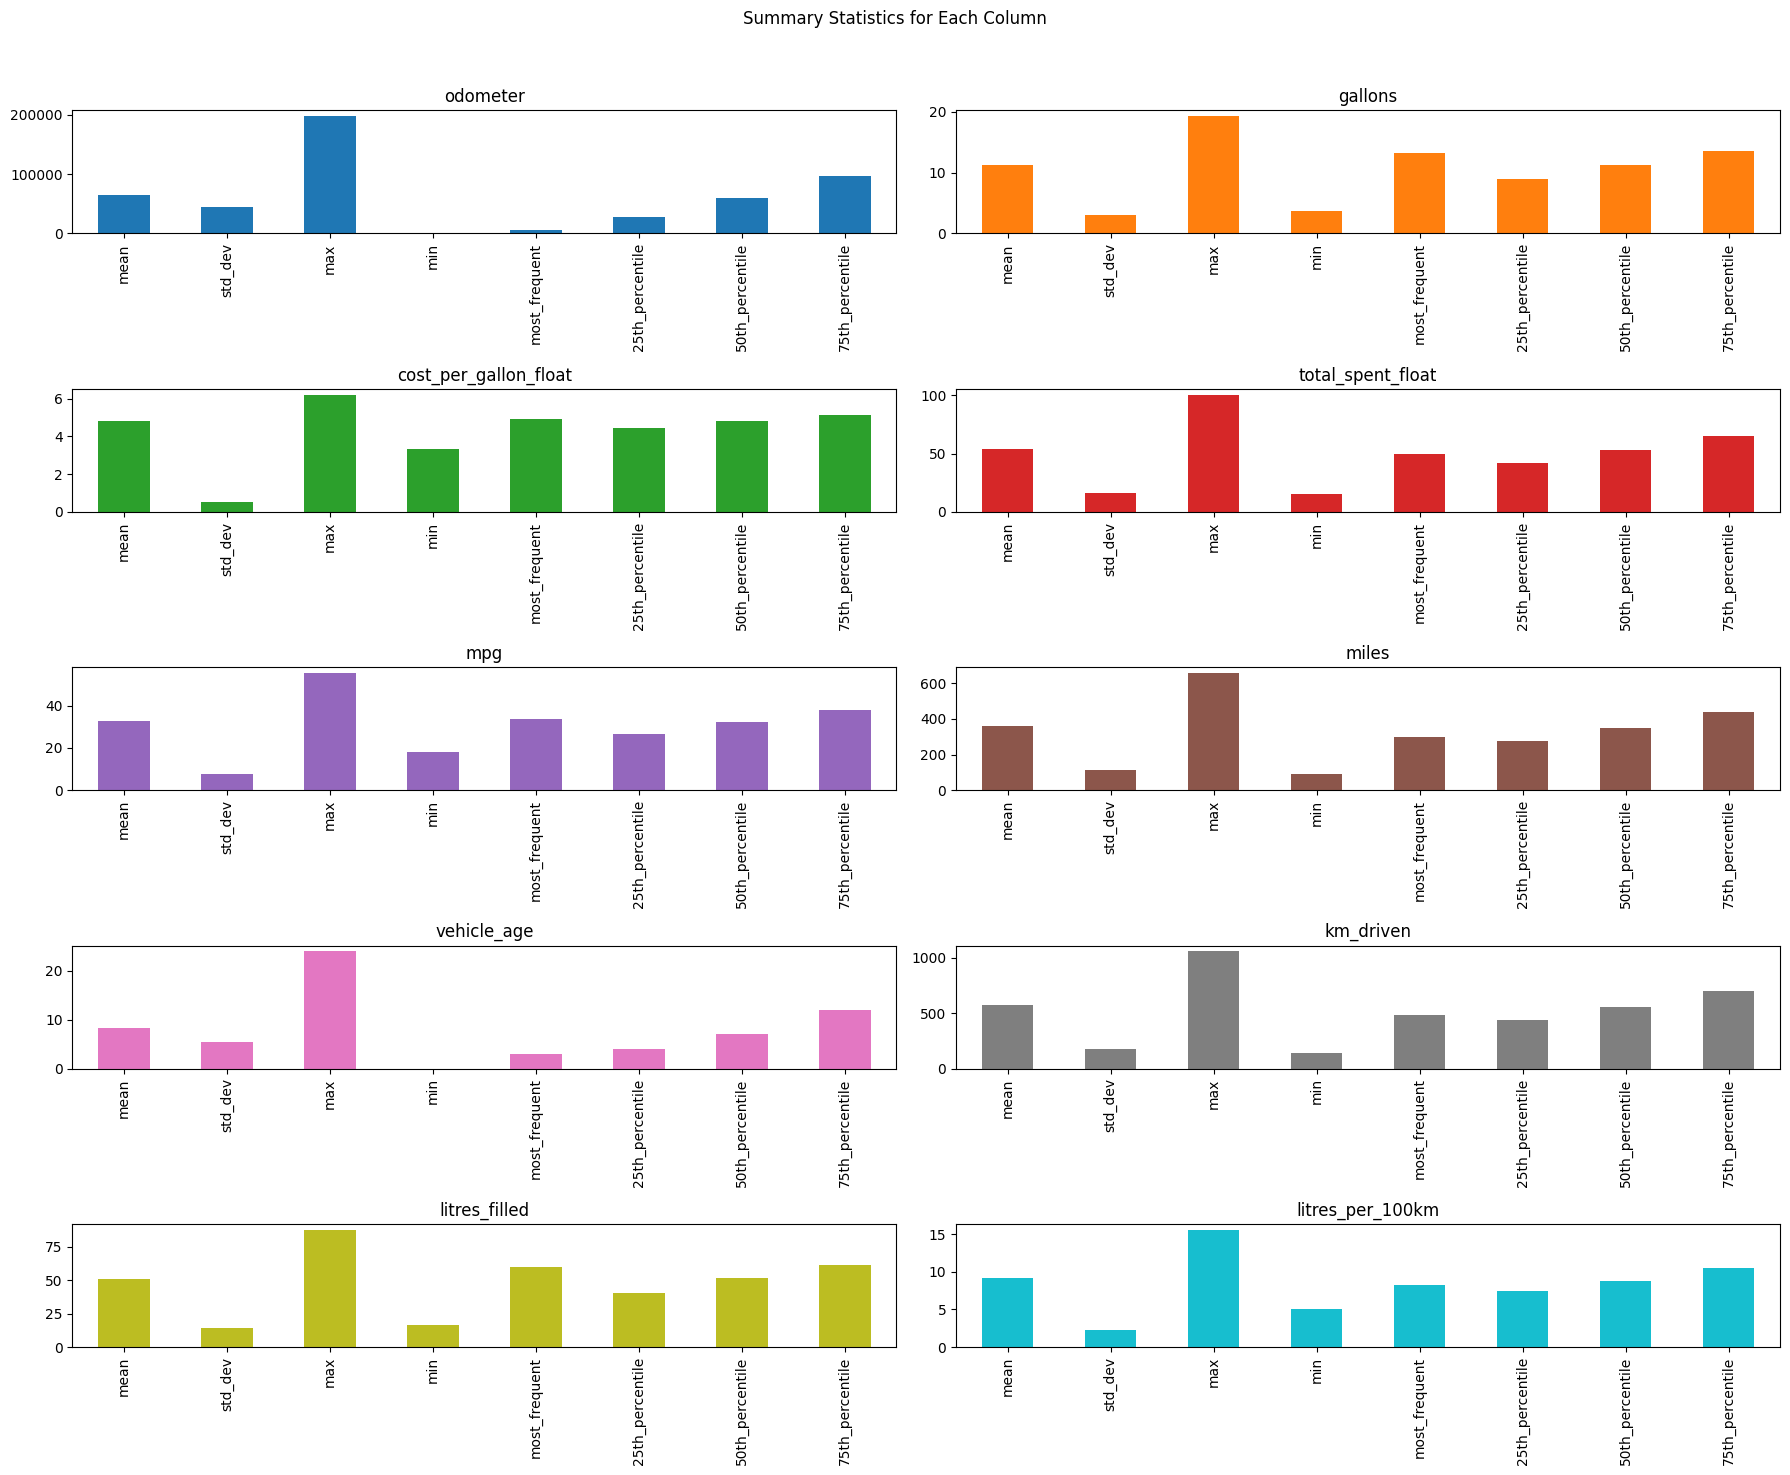

Count =  28934


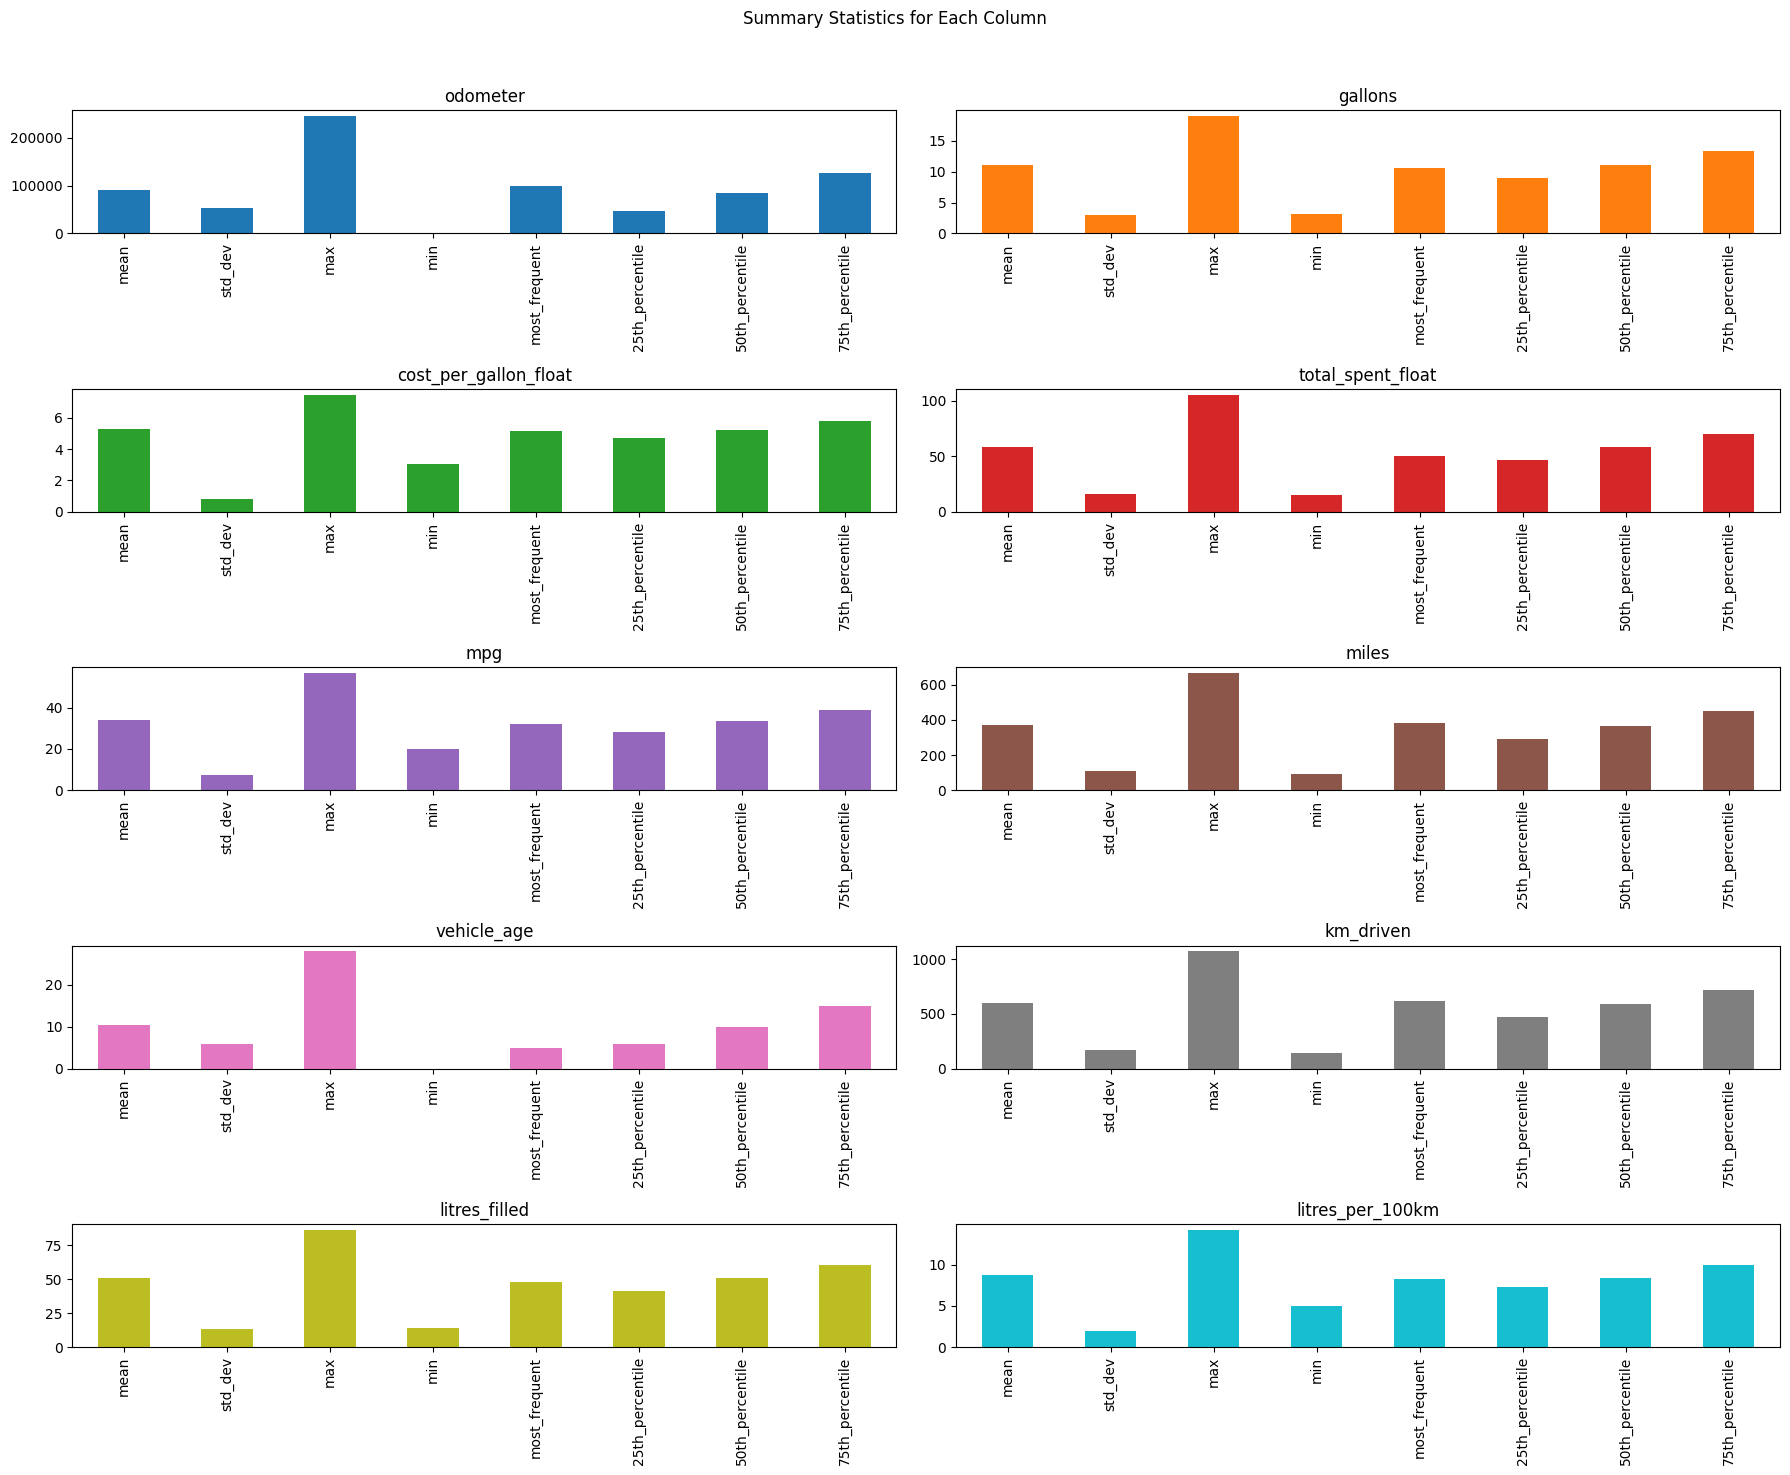

Count =  20788


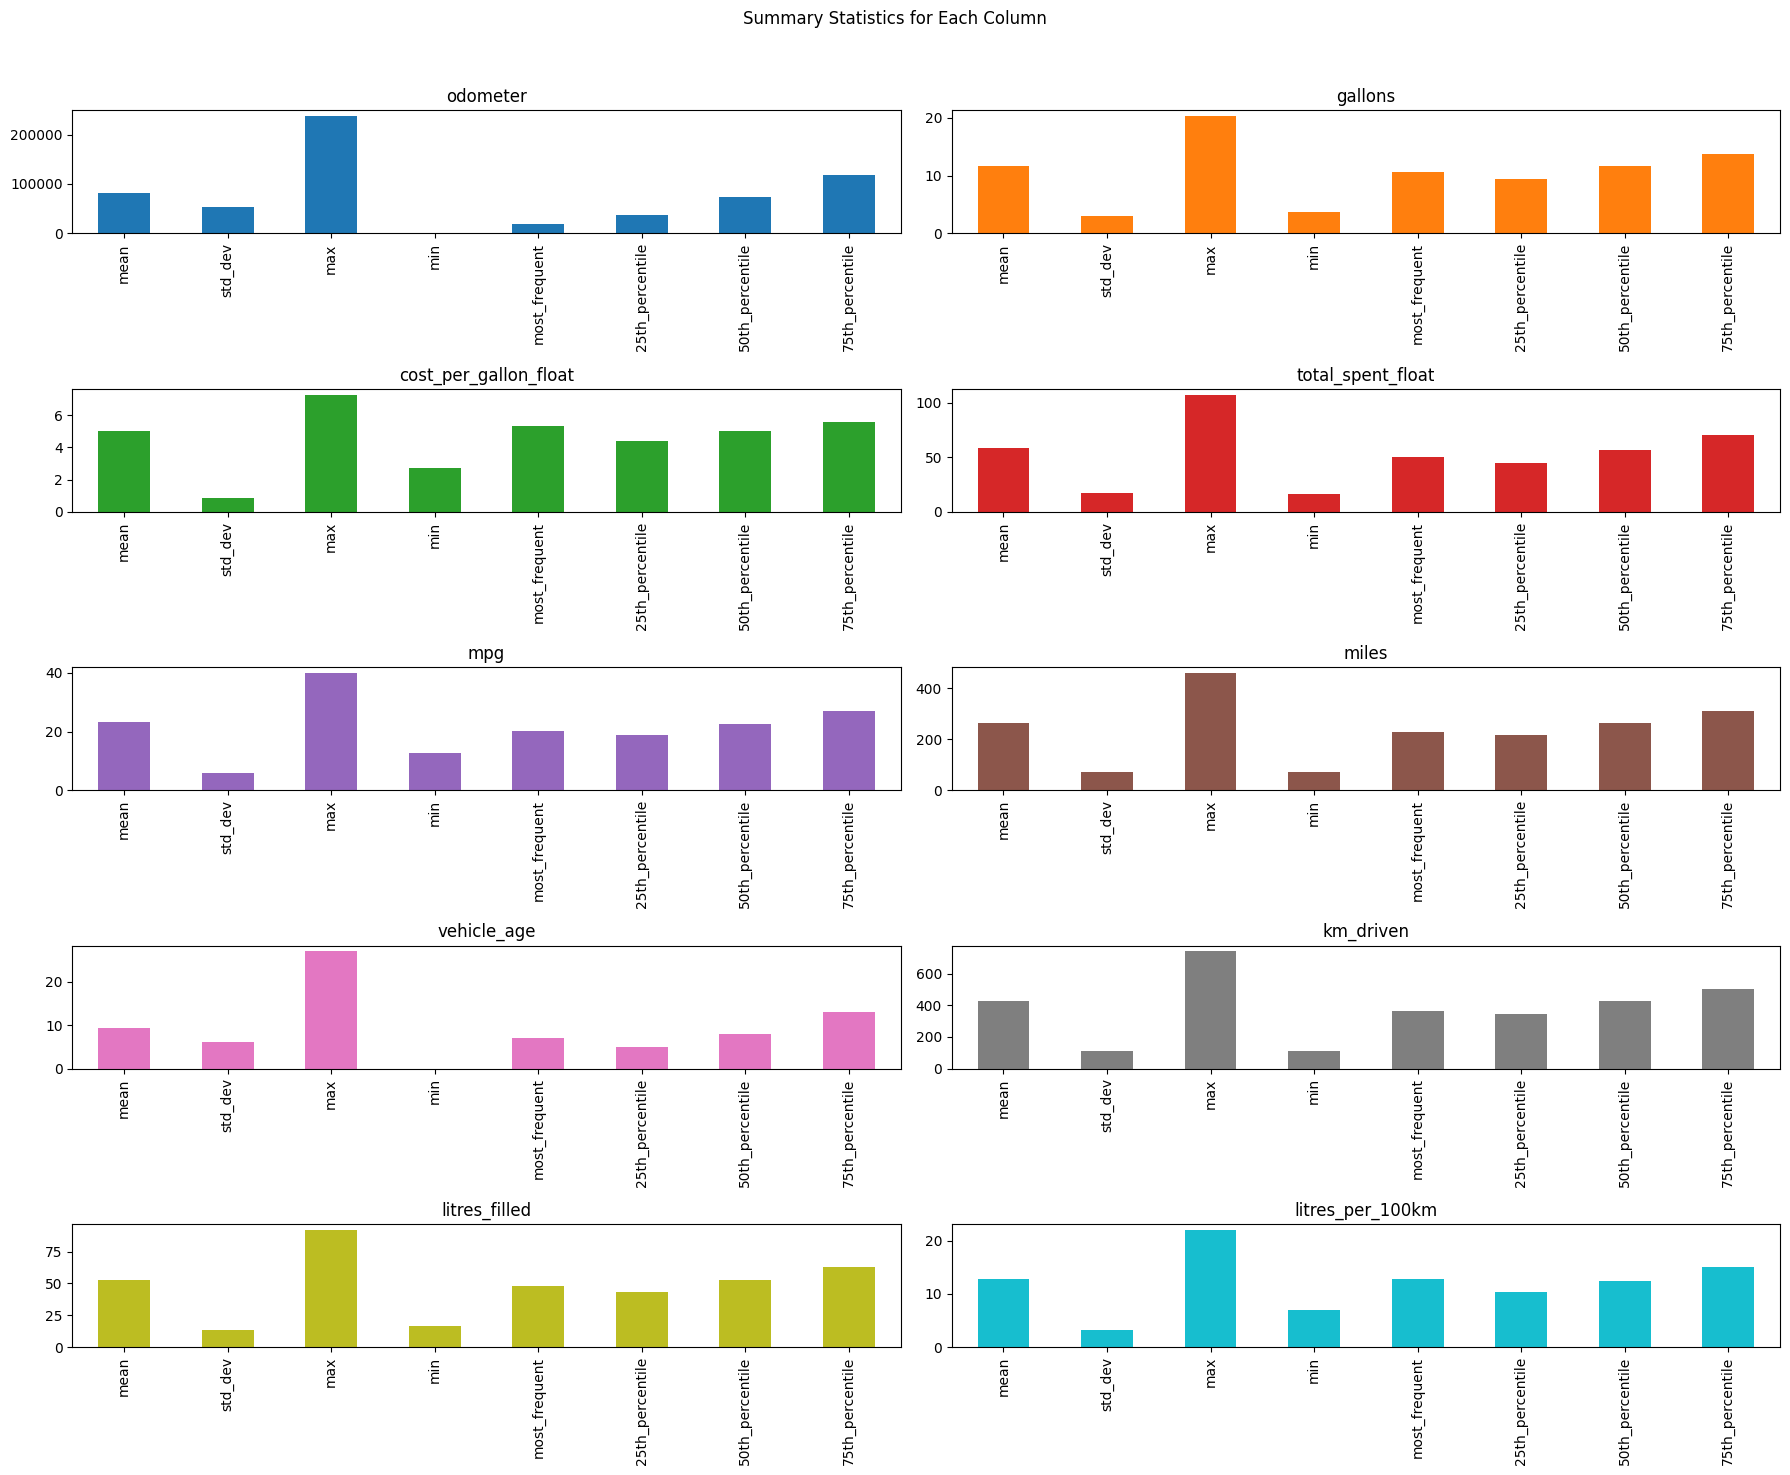

Count =  18203


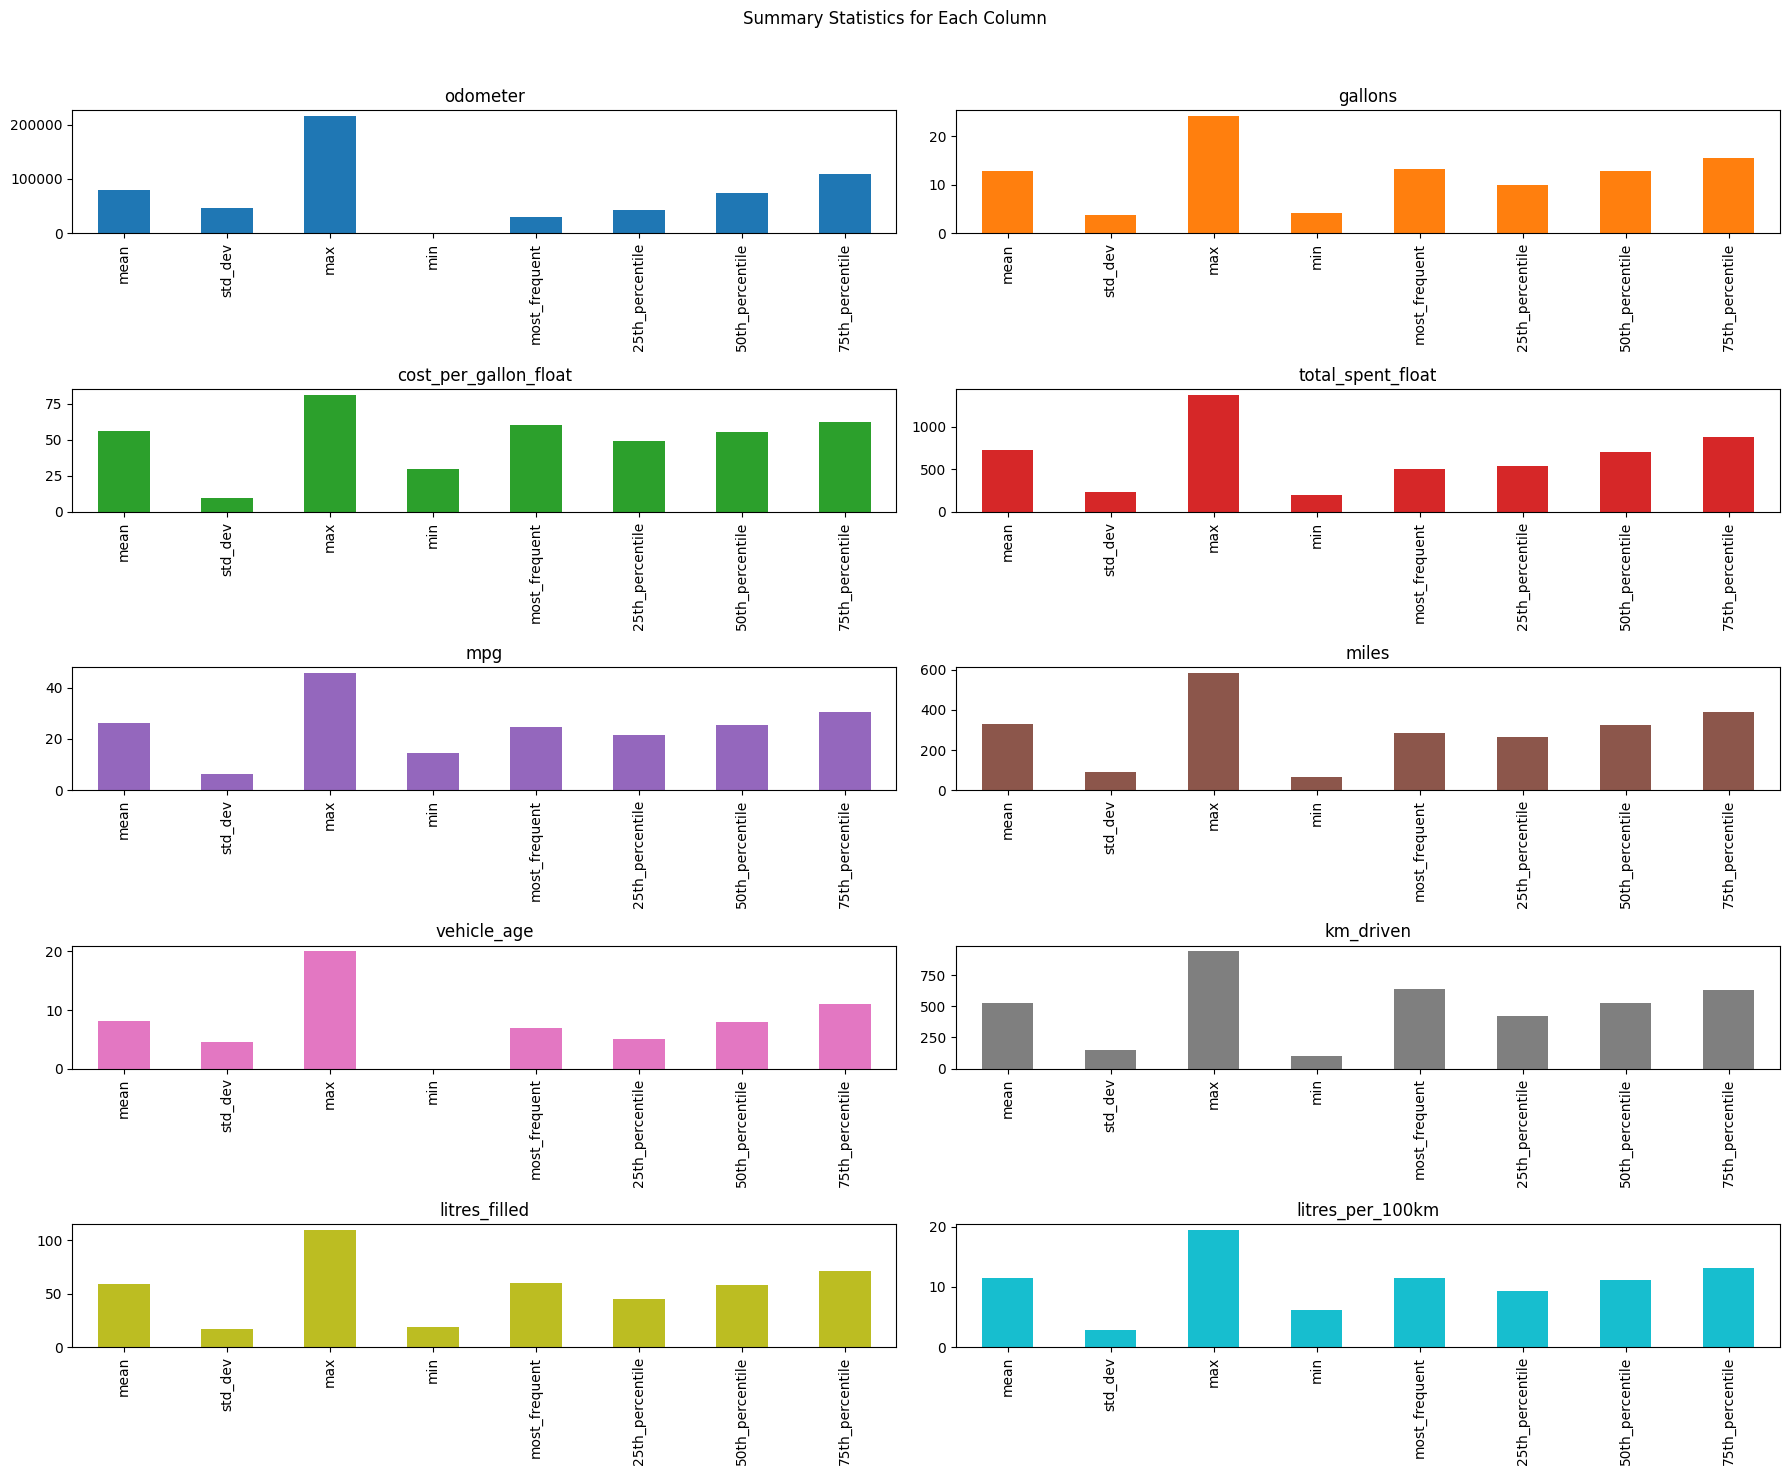

Shape before: (835228, 18)
Shape after: (502243, 18)


In [68]:
from pyod.models.abod import ABOD
from pyod.models.iforest import IForest
from sklearn.decomposition import PCA




def clean_iforest(df_in,top_5_currencies,columns):
    df_top_5 = df_in[df_in['currency'].isin(top_5_currencies)]
    temp_df = df_in.copy()
    for country in top_5_currencies:
        
        # Filter the DataFrame for the current currency
        country_df = df_top_5.loc[df_top_5['currency'] == country]
        country_df.dropna()
        numerical_df = country_df[columns].copy()
        numerical_df.dropna()
        iso_forest = IForest(contamination=0.2, random_state=42)
        # Initialize and fit IFOREST
        iso_forest.fit(numerical_df)

        # Step 3: Get the outlier predictions and decision function scores
        outlier_predictions = iso_forest.predict(numerical_df)
        outlier_scores = iso_forest.decision_function(numerical_df)

        # Step 4: Perform PCA for 2D visualization
        outlier_indices = numerical_df.index[outlier_predictions == 1]
        temp_df = temp_df.drop(index=outlier_indices)
        
    return temp_df

def clean_abod_chunking(df_in,top_5_currencies,columns):
    
    temp_df = df_in.copy()
    
    df_top_5 = df_in[df_in['currency'].isin(top_5_currencies)]
    for country in top_5_currencies:
        country_df = df_top_5.loc[df_top_5['currency'] == country]
        numerical_df = country_df[columns]
        chunk_size = 10000
        abod = ABOD()        
        for start in range(0, numerical_df.shape[0], chunk_size):
            end = min(start + chunk_size, numerical_df.shape[0])
            chunk = numerical_df.iloc[start:end]

            # Normalize the chunk

            # Fit ABOD to the chunk
            abod.fit(chunk)

            # Get outlier scores and predictions
            outlier_predictions = abod.predict(chunk)
            outlier_scores = abod.decision_function(chunk)

            # Store results
            outlier_indices = chunk.index[outlier_predictions == 1]
            temp_df = temp_df.drop(index=outlier_indices)
    return temp_df

def clean_IQR(df_in, columns):
    df_top_5 = df_in[df_in['currency'].isin(top_5_currencies)]
    temp_df = df_in.copy()
    
    temp_df.dropna()
    
    for country in top_5_currencies:
        # Filter the DataFrame for the current currency
        country_df = df_top_5.loc[df_top_5['currency'] == country]
        country_df.dropna()
        for column in columns:
            Q1 = float(country_df[column].quantile(0.25))
            Q3 = float(country_df[column].quantile(0.75))
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
        
            country_df = country_df[(country_df[column] >= lower_bound) & (country_df[column] <= upper_bound)]        
        # Update temp_df with the filtered country_df
        temp_df = pd.concat([temp_df[temp_df['currency'] != country], country_df], ignore_index=True)
    
    return temp_df      

def clean_currency_costpergallon_missmatch(df_in_cleaned,precision = 0):
    # need to make sure that total spent / gallons = costper gamlon
    print("before mismatch clean",df_in_cleaned.shape[0])
    
    df_cleaned = df_in_cleaned[
        round(df_in_cleaned['total_spent_float'] / df_in_cleaned['gallons'], precision) == 
        round(df_in_cleaned['cost_per_gallon_float'], precision)
    ]    
    print("after mismatch clean",df_cleaned.shape[0])
    return df_cleaned
    
    

def Debug_by_Currency(top_5_currencies_in,df_in, columns):
    
    # get all that are in top 5 currencies
    df_top_5 = df_in[df_in['currency'].isin(top_5_currencies_in)]
    # columns = ['odometer', 'gallons', 'cost_per_gallon_float', 'total_spent_float', 'mpg', 'miles']

    for country in top_5_currencies_in:
        df_selected = df_top_5[df_top_5['currency'] == country]
        print("Count = ", df_selected['odometer'].count())
        df_selected = df_selected[columns]
        statistics = {
            'mean': df_selected.mean(),
            'std_dev': df_selected.std(),
            'max': df_selected.max(),
            'min': df_selected.min(),
            'most_frequent': df_selected.mode().iloc[0],  # Mode might return multiple values; take the first one
            '25th_percentile': df_selected.quantile(0.25),
            '50th_percentile': df_selected.median(),  # same as the 50th percentile (second quartile)
            '75th_percentile': df_selected.quantile(0.75)
        }

        statistics_df = pd.DataFrame(statistics)
        statistics_df.T.plot(kind='bar', figsize=(18, 15), subplots=True, layout=(5, 2), sharex=False, sharey=False, legend=False)
        plt.suptitle('Summary Statistics for Each Column')
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

columns = ['odometer', 'gallons', 'cost_per_gallon_float', 'total_spent_float', 'mpg', 'miles','vehicle_age','km_driven','litres_filled','litres_per_100km',]

shape_before = df[df['currency'].isin(top_5_currencies)]
# Drop negatives

# clean with isoforest
print("Before isoforest",shape_before.shape[0])
temp_df = clean_iforest(df,top_5_currencies,columns)
print("After isoforest",temp_df.shape[0])


# clean with iqr
print("Before iqr",temp_df.shape[0])
temp_df = clean_IQR(temp_df,columns)
print("After iqr",temp_df.shape[0])
# If someone uses the wrong currency, either it will be reflectin the cost per gallons and become an outlier,
# and if not then there will be an arithmatical missmatch between the cot of gallons, total spent and the gallons. 
temp_df = clean_currency_costpergallon_missmatch(temp_df)
### Debugging ####
Debug_by_Currency(top_5_currencies,temp_df,columns)
##################
df_top_5_cleaned = temp_df[temp_df['currency'].isin(top_5_currencies)]

df = df_top_5_cleaned

print("Shape before:",shape_before.shape)
print("Shape after:",df_top_5_cleaned.shape)


### 4.2 ###


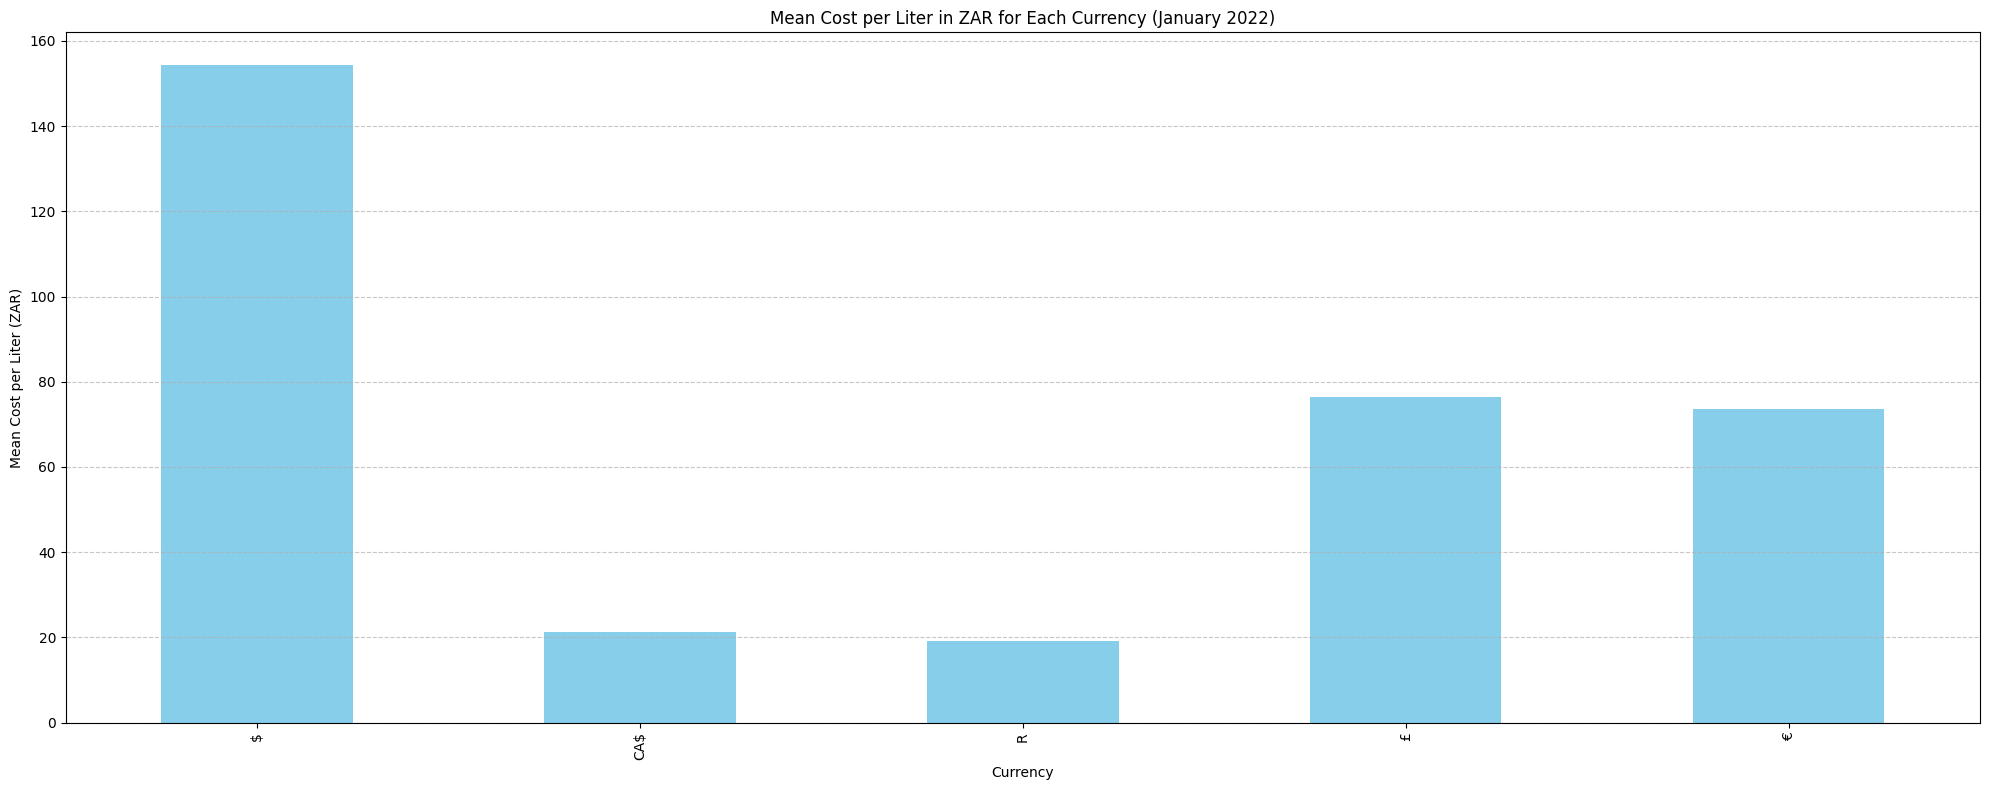

In [69]:
#4.2.1


#dictionary mapping symbol to currency conversion
country_to_conversion_rate = {
    '$': 15.3823251591,
    '£': 21.04047696756128,
    '€': 17.55691938247276,
    'CA$': 12.251039269863115,
    'R': 1

}

# Assuming the DataFrame is named df

# Convert 'date_fueled' to datetime if not already done
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')

# Filter for January 2022
jan_2022_df = df[(df['date_fueled'].dt.year == 2022) & (df['date_fueled'].dt.month == 1)].copy()

def convert_to_zar(row):
    currency = row['currency']
    if currency in country_to_conversion_rate:
        conversion_rate = country_to_conversion_rate[currency]
        cost_per_gallon_zar = row['cost_per_gallon_float'] * conversion_rate
        cost_per_liter_zar = cost_per_gallon_zar / 3.78541  # Gallon to liter conversion
        return cost_per_liter_zar
    else:
        return None


jan_2022_df['cost_per_liter_zar'] = jan_2022_df.apply(convert_to_zar, axis=1)


jan_2022_df = jan_2022_df.dropna(subset=['cost_per_liter_zar'])

# Print results or save to file
# jan_2022_df[['date_fueled', 'currency', 'cost_per_liter_zar']].head(30)

mean_cost_per_liter_per_currency = jan_2022_df.groupby('currency')['cost_per_liter_zar'].mean()



# Plot mean cost per liter per currency
plt.figure(figsize=(20, 8))
mean_cost_per_liter_per_currency.plot(kind='bar', color='skyblue')

plt.xlabel('Currency')
plt.ylabel('Mean Cost per Liter (ZAR)')
plt.title('Mean Cost per Liter in ZAR for Each Currency (January 2022)')
plt.xticks(rotation=90)  # Rotate x-axis labels to vertical
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()





In [70]:

df = df.sort_values(['user_id', 'date_fueled'])


df['odometer_diff'] = df.groupby('user_id')['odometer'].diff()


avg_diff = df.groupby('user_id')['odometer_diff'].mean()


df = df.merge(avg_diff.rename('avg_odometer_diff'), on='user_id')
df['potential_missed_fillup'] = df['odometer_diff'] > (2 * df['avg_odometer_diff'])
missed_fillups_count = df['potential_missed_fillup'].sum()

print(f"Estimated number of missed fill-ups: {missed_fillups_count}")

Estimated number of missed fill-ups: 96321


Country with the largest average distance per tank: BWP, Distance: 5505.12 km


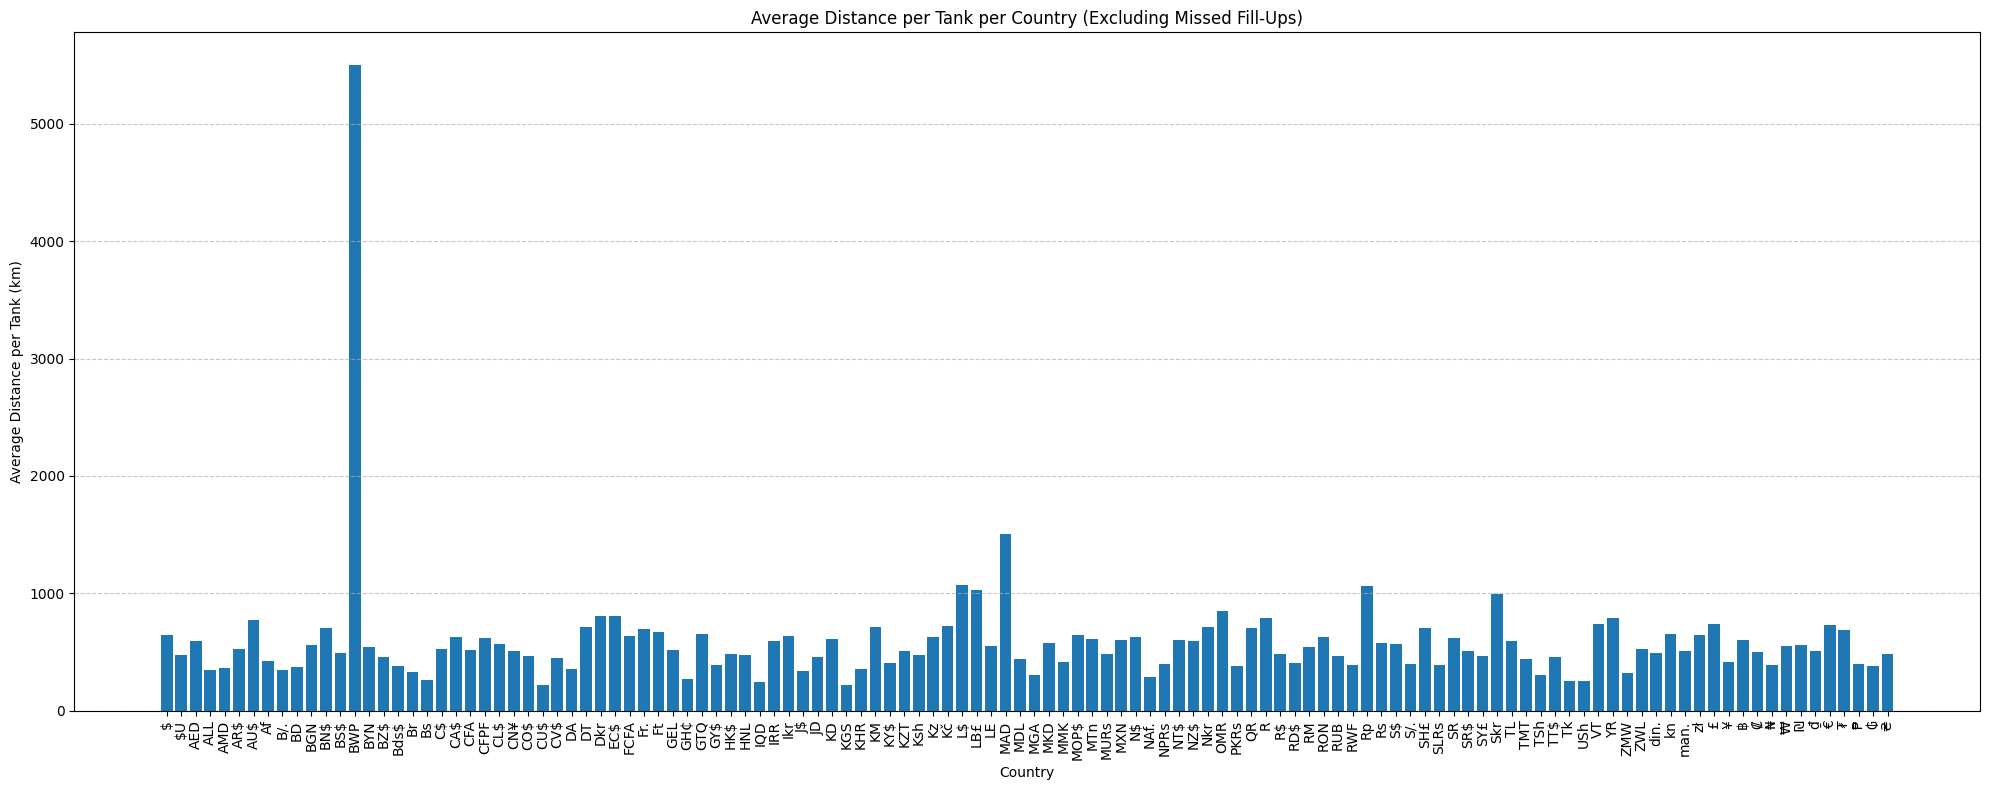

In [71]:
# Sort by user and then by odometer reading
df = df.sort_values(by=['user_url', 'odometer'])

# Calculate distance per fill-up
df['distance_per_fill'] = df.groupby('user_url')['odometer'].diff()

# Drop NaN values (first fill-up for each user where we can't calculate distance)
df = df.dropna(subset=['distance_per_fill'])

# Exclude records with potential missed fill-ups
df_no_missed = df[~df['potential_missed_fillup']]

# Step 3: Calculate the average distance per tank for each country

# Group by country and calculate the average distance per tank
average_distance_per_tank = df_no_missed.groupby('currency')['distance_per_fill'].mean().reset_index()

# Rename the columns for clarity
average_distance_per_tank.columns = ['currency', 'avg_distance_per_tank_km']

# Identify the country with the largest average distance
max_distance_country = average_distance_per_tank.loc[average_distance_per_tank['avg_distance_per_tank_km'].idxmax()]

print(f"Country with the largest average distance per tank: {max_distance_country['currency']}, Distance: {max_distance_country['avg_distance_per_tank_km']} km")

# Step 4: Plot the average distance per tank per country

plt.figure(figsize=(20, 8))
plt.bar(average_distance_per_tank['currency'], average_distance_per_tank['avg_distance_per_tank_km'])
plt.xlabel('Country')
plt.ylabel('Average Distance per Tank (km)')
plt.title('Average Distance per Tank per Country (Excluding Missed Fill-Ups)')
plt.xticks(rotation=90)  # Rotate x-axis labels to vertical
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

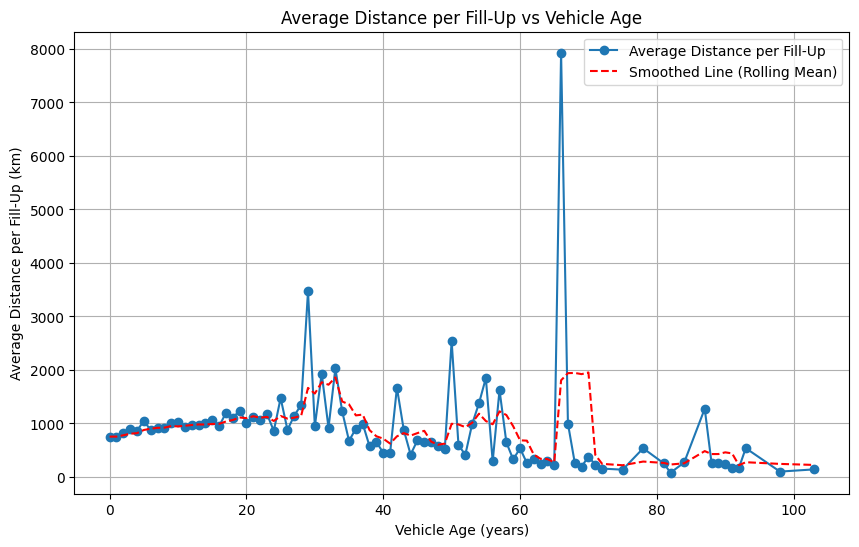

In [72]:
#4.2.4

# # Convert the 'year' column to numeric, forcing errors to NaN if any non-numeric values are present
# df['year'] = pd.to_numeric(df['year'], errors='coerce')


# df['vehicle_age'] = df['date_fueled'].dt.year - df['year']
avg_distance_by_age = df.groupby('vehicle_age')['distance_per_fill'].mean().reset_index()

avg_distance_by_age.columns = ['vehicle_age', 'avg_distance_per_fill_km']
rolling_window = 5  # You can adjust the window size as needed
avg_distance_by_age['smoothed'] = avg_distance_by_age['avg_distance_per_fill_km'].rolling(window=rolling_window, min_periods=1).mean()
# Plot the average distance per fill-up by vehicle age
plt.figure(figsize=(10, 6))
plt.plot(avg_distance_by_age['vehicle_age'], avg_distance_by_age['avg_distance_per_fill_km'], marker='o', label='Average Distance per Fill-Up')
plt.plot(avg_distance_by_age['vehicle_age'], avg_distance_by_age['smoothed'], color='red', label='Smoothed Line (Rolling Mean)', linestyle='--')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Average Distance per Fill-Up (km)')
plt.title('Average Distance per Fill-Up vs Vehicle Age')
plt.grid(True)
plt.legend()
plt.show()





In [73]:
df.columns

Index(['date_fueled', 'date_captured', 'odometer', 'gallons', 'mpg', 'miles',
       'user_url', 'currency', 'total_spent_float', 'cost_per_gallon_float',
       'car_make', 'model', 'year', 'user_id', 'litres_filled', 'km_driven',
       'litres_per_100km', 'vehicle_age', 'odometer_diff', 'avg_odometer_diff',
       'potential_missed_fillup', 'distance_per_fill'],
      dtype='object')

In [74]:
# 4.2.5

# Filter for vehicles in South Africa (currency set to R)
sa_vehicles_df = df[df['currency'] == 'R'].copy()

# Identify the top 5 most popular vehicles based on their 'car_make' and 'model'
top_vehicles = sa_vehicles_df.groupby(['car_make', 'model']).size().nlargest(5).index

# Filter the DataFrame for only the top 5 vehicles
top_vehicles_df = sa_vehicles_df[sa_vehicles_df.set_index(['car_make', 'model']).index.isin(top_vehicles)].copy()

# Convert mpg to km/l
# top_vehicles_df['km_per_l'] = top_vehicles_df['mpg'] * 0.425144

# Calculate the average fuel efficiency for each of the top 5 vehicles
fuel_efficiency = top_vehicles_df.groupby(['car_make', 'model'])['litres_per_100km'].mean().reset_index()

# Sort the result by fuel efficiency in descending order
fuel_efficiency = fuel_efficiency.sort_values(by='litres_per_100km', ascending=False)

# Display the results
fuel_efficiency




,car_make,model,litres_per_100km
2,suzuki,jimny,13.634812
1,mitsubishi,pajero,12.398020
3,toyota,fortuner,12.139456
4,toyota,hilux,12.092440
0,ford,ranger,10.866143


In [75]:
#4.2.6

# Ensure the necessary columns are numeric and convert mpg to km/l
# df['km_per_l'] = df['mpg'] * 0.425144

# Group by currency and vehicle and calculate the average fuel efficiency
average_fuel_efficiency = df.groupby(['currency', 'car_make', 'model'])['litres_per_100km'].mean().reset_index()

# For each currency, sort the vehicles by fuel efficiency and select the top 5
top_5_per_country = average_fuel_efficiency.sort_values(by=['currency', 'litres_per_100km'], ascending=[True, False])
top_5_per_country = top_5_per_country.groupby('currency').head(5)

# Display the results
top_5_per_country

,currency,car_make,model,litres_per_100km
1625,$,volvo,744,714.775480
1131,$,mitsubishi,grandis,386.662959
1514,$,volkswagen,1302,326.246218
566,$,hyundai,atos,266.767487
774,$,lexus,nx350,247.389912
...,...,...,...,...
9690,₴,hyundai,matrix,294.953123
9685,₴,hyundai,accent,136.793091
9698,₴,land_rover,range_rover,29.533565
9703,₴,mitsubishi,pajero,22.756250


In [76]:
df.columns

Index(['date_fueled', 'date_captured', 'odometer', 'gallons', 'mpg', 'miles',
       'user_url', 'currency', 'total_spent_float', 'cost_per_gallon_float',
       'car_make', 'model', 'year', 'user_id', 'litres_filled', 'km_driven',
       'litres_per_100km', 'vehicle_age', 'odometer_diff', 'avg_odometer_diff',
       'potential_missed_fillup', 'distance_per_fill'],
      dtype='object')

C:\Users\Tumi\AppData\Local\Temp\ipykernel_16332\1721910906.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canada['season'] = df_canada['date_fueled'].apply(get_season)


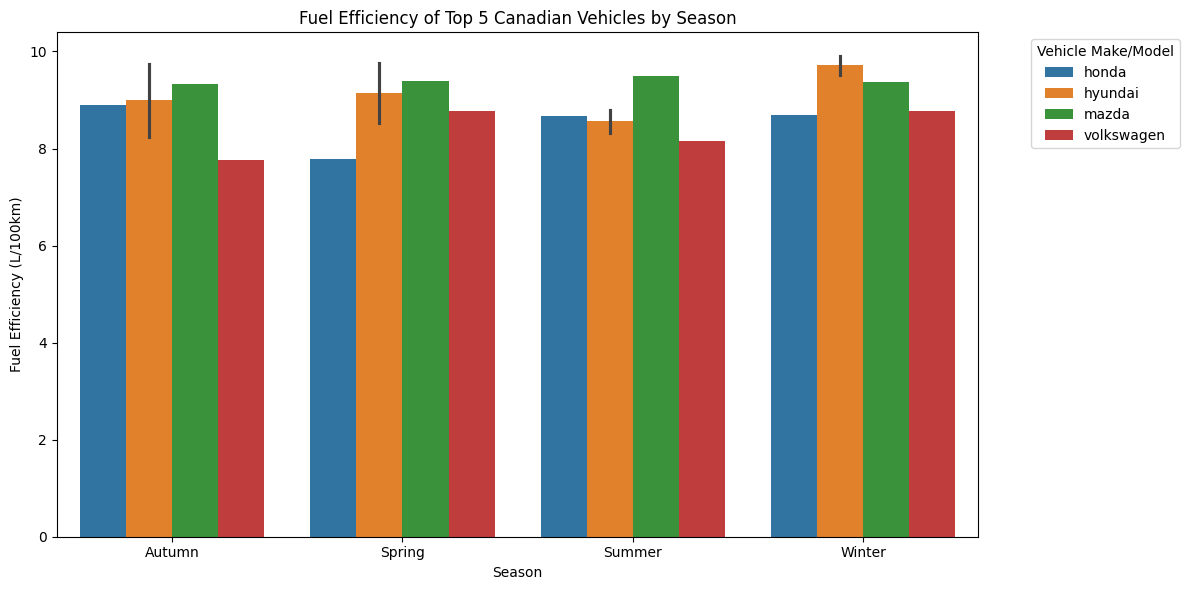

      car_make    model  season  litres_per_100km
0        honda    civic  Autumn          8.896192
1        honda    civic  Spring          7.775385
2        honda    civic  Summer          8.664892
3        honda    civic  Winter          8.682891
4      hyundai   accent  Autumn          9.746967
5      hyundai   accent  Spring          8.530070
6      hyundai   accent  Summer          8.786922
7      hyundai   accent  Winter          9.899460
8      hyundai  elantra  Autumn          8.234740
9      hyundai  elantra  Spring          9.757283
10     hyundai  elantra  Summer          8.327968
11     hyundai  elantra  Winter          9.523011
12       mazda  3_sport  Autumn          9.327930
13       mazda  3_sport  Spring          9.381532
14       mazda  3_sport  Summer          9.491943
15       mazda  3_sport  Winter          9.367262
16  volkswagen     golf  Autumn          7.767707
17  volkswagen     golf  Spring          8.781337
18  volkswagen     golf  Summer          8.152052


In [77]:
#4.2.7


# 1. Filter for Canadian vehicles
df_canada = df[df['currency'] == 'CA$']

# 2. Identify top 5 Canadian vehicles
top_5_vehicles = df_canada.groupby(['car_make', 'model']).size().nlargest(5).index.tolist()

# 3. Determine the season for each entry
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df_canada['season'] = df_canada['date_fueled'].apply(get_season)

# 4. Calculate average fuel efficiency for each vehicle in each season
df_top5 = df_canada[df_canada.set_index(['car_make', 'model']).index.isin(top_5_vehicles)]
avg_efficiency = df_top5.groupby(['car_make', 'model', 'season'])['litres_per_100km'].mean().reset_index()

# 5. Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='litres_per_100km', hue='car_make', data=avg_efficiency)
plt.title('Fuel Efficiency of Top 5 Canadian Vehicles by Season')
plt.xlabel('Season')
plt.ylabel('Fuel Efficiency (L/100km)')
plt.legend(title='Vehicle Make/Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Optional: Print the data
print(avg_efficiency)

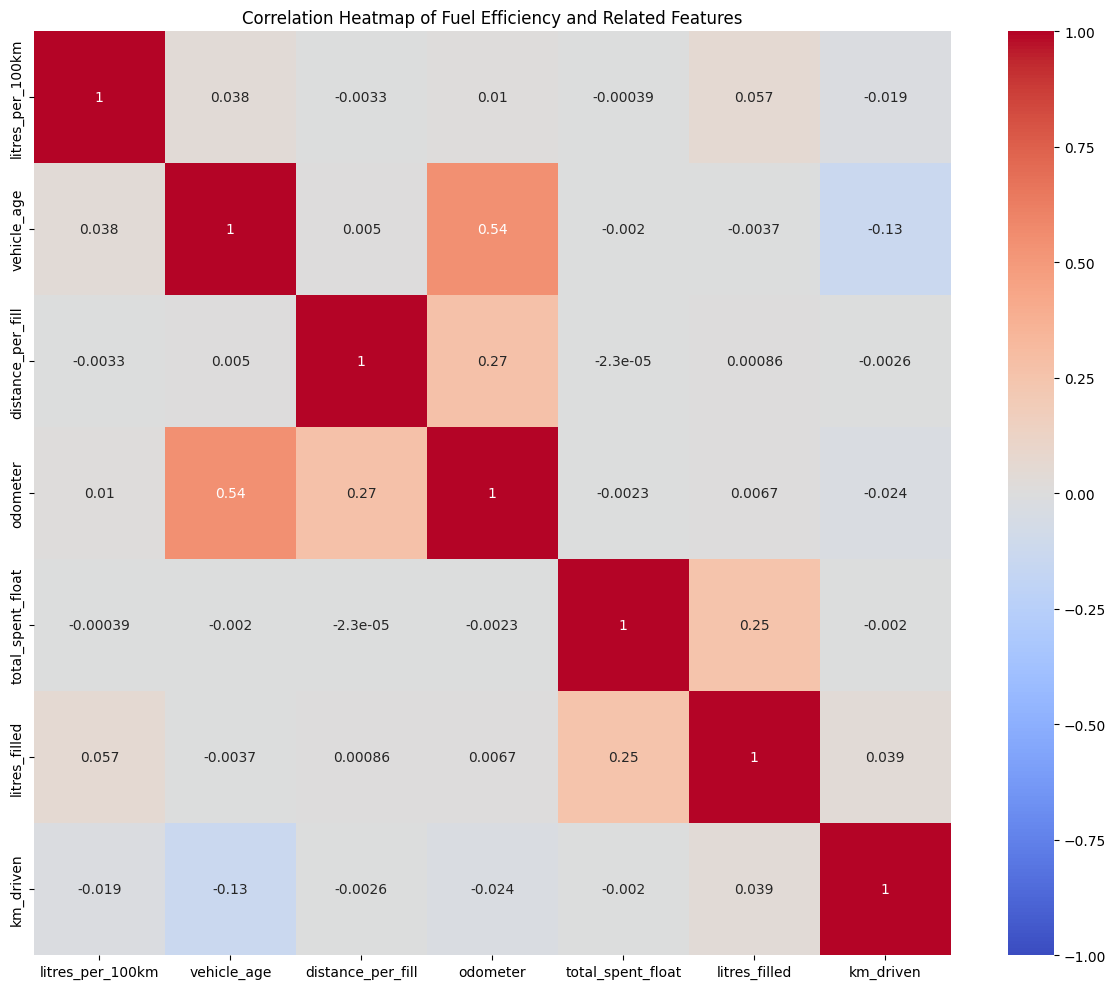


Correlations with litres_per_100km:
litres_per_100km     1.000000
litres_filled        0.057001
vehicle_age          0.037840
odometer             0.010297
total_spent_float   -0.000389
distance_per_fill   -0.003329
km_driven           -0.018949
Name: litres_per_100km, dtype: float64


In [78]:
#4.2.8

# Select relevant numerical features
features = [ 'litres_per_100km', 'vehicle_age', 'distance_per_fill', 'odometer', 'total_spent_float', 'litres_filled', 'km_driven']

# Create a correlation matrix
corr_matrix = df[features].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Fuel Efficiency and Related Features')
plt.tight_layout()
plt.show()

# Print the correlation values for fuel efficiency metrics
print("\nCorrelations with litres_per_100km:")
print(corr_matrix['litres_per_100km'].sort_values(ascending=False))


In [79]:
#4.2.9

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Define features
features = ['vehicle_age', 'distance_per_fill', 'odometer', 'total_spent_float', 
            'litres_filled', 'km_driven', 'car_make', 'model', 'currency']

# Create a copy of the dataframe with selected features
df_model = df[features + ['litres_per_100km']].copy()

# Encode categorical variables
le = LabelEncoder()
for col in ['car_make', 'model', 'currency']:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

# Split features and target
X = df_model[features]
y = df_model['litres_per_100km']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_imp = pd.DataFrame({'feature': features, 'importance': importances})
feature_imp = feature_imp.sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(feature_imp['feature'], feature_imp['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance for Predicting Fuel Efficiency (litres_per_100km)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Print feature importances
print(feature_imp)

# Calculate and print the difference between each feature's importance
feature_imp['importance_diff'] = feature_imp['importance'].diff().abs()
print("\nDifference in importance between adjacent features:")
print(feature_imp[['feature', 'importance', 'importance_diff']])


## 4.3 ##


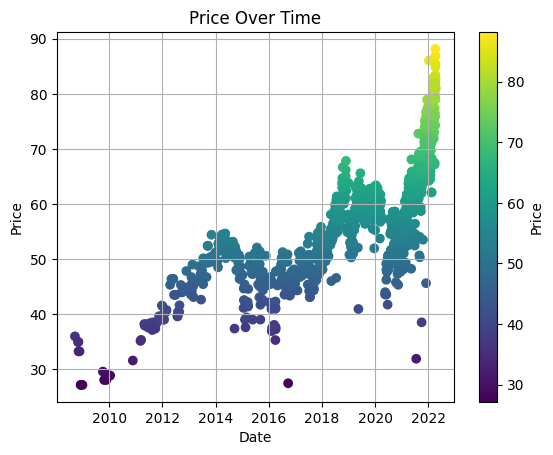

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Filter for South African drivers
sa_drivers_df = df.loc[df['currency'] == 'R'] 
sa_drivers_df = sa_drivers_df.sort_values('date_fueled')

# Calculate the rolling average (window size can be adjusted, e.g., 7 days, 30 days)
window_size = 7
sa_drivers_df['rolling_avg'] = sa_drivers_df['cost_per_gallon_float'].rolling(window=window_size).mean()

# color map
norm = plt.Normalize(sa_drivers_df['cost_per_gallon_float'].min(), sa_drivers_df['cost_per_gallon_float'].max())
cmap = plt.get_cmap('viridis')  # A colormap without white space

# Plot the scatter plot
plt.scatter(sa_drivers_df['date_fueled'], sa_drivers_df['cost_per_gallon_float'], 
            c=sa_drivers_df['cost_per_gallon_float'], cmap=cmap, norm=norm, marker='o', alpha=0.7)

# Plot the rolling average as a line plot
plt.plot(sa_drivers_df['date_fueled'], sa_drivers_df['rolling_avg'], color='red', label=f'{window_size}-Day Rolling Average')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Over Time with Rolling Average')
plt.colorbar(label='Price')  # Add a colorbar to show the price scale
plt.grid(True)
plt.legend()
plt.show()


C:\Users\Tumi\AppData\Local\Temp\ipykernel_16332\1533653830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa_drivers_df['day_of_week'] = sa_drivers_df['date_captured'].dt.dayofweek


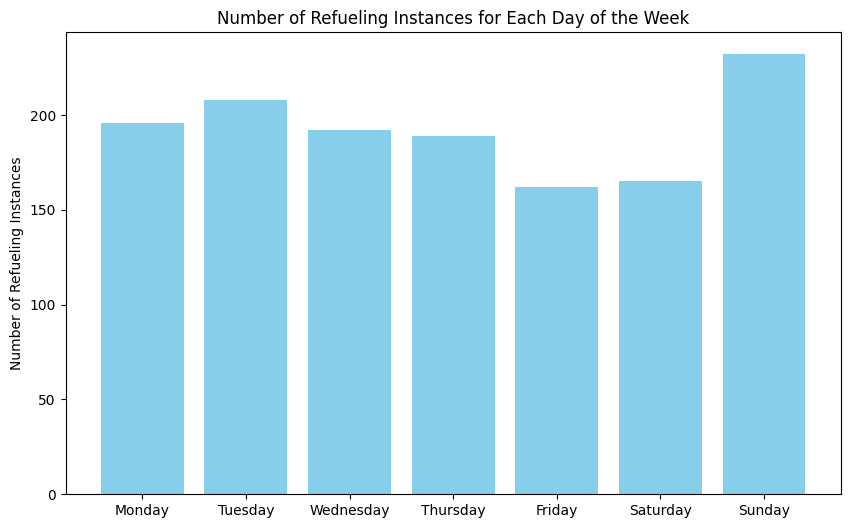

In [ ]:
# 4.3.3. Using a suitable plot, show if the difference in the number of people refueling on a Tuesday vs other days. [3]
# Using a bar graph, 2 bars mean of tuesdays other bar, mean of all other days
# Calculate the number of entries (rows) for each day of the week
sa_drivers_df['day_of_week'] = sa_drivers_df['date_captured'].dt.dayofweek
# Calculate the number of entries (rows) for each day of the week
day_counts = sa_drivers_df['day_of_week'].value_counts().sort_index()

# Plot the averages for each day of the week
plt.figure(figsize=(10, 6))
plt.bar(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], day_counts, color='skyblue')
plt.ylabel('Number of Refueling Instances')
plt.title('Number of Refueling Instances for Each Day of the Week')
plt.show()

In [ ]:
# 4.3.4. Now reduce your dataset to only the entries on the 1st Tuesday and 1st Wednesday in SA every month. [2]

def get_1st_tuesday_wednesday(df):
    result = []
    for month, group in df.groupby(df['date_fueled'].dt.to_period('M')):
        first_tuesday = group[(group['day_of_week'] == 1) & (group['date_fueled'].dt.day <= 7)]
        first_wednesday = group[(group['day_of_week'] == 2) & (group['date_fueled'].dt.day <= 7)]
        result.append(first_tuesday)
        result.append(first_wednesday)
    return pd.concat(result)

tues_weds_df = get_1st_tuesday_wednesday(sa_drivers_df)


In [ ]:
# 4.3.5. For each Tuesday and Wednesday, add an indicator for whether the price goes up or the price goes down that month
# So we make a new column

filtered_df = tues_weds_df.sort_values(by='date_fueled').reset_index(drop=True)
filtered_df['price_change'] = filtered_df['cost_per_gallon_float'].diff().fillna(0)
filtered_df['price_indicator'] = filtered_df['price_change'].apply(lambda x: 'Increase' if x > 0 else ('Decrease' if x < 0 else 'No Change'))

filtered_df.head(10)




,date_fueled,date_captured,odometer,gallons,mpg,miles,user_url,currency,total_spent_float,cost_per_gallon_float,...,km_driven,litres_per_100km,vehicle_age,odometer_diff,avg_odometer_diff,potential_missed_fillup,distance_per_fill,day_of_week,price_change,price_indicator
0,2008-11-04,2012-06-05,6314.0,1.429,0.0,0.0000,https://www.somewebsite.com/suzuki/st90v/1983/...,R,49.98,34.98,...,0.000000,0.000000,29.0,99.0,332.500000,False,99.0,1,0.00,No Change
1,2008-11-05,2008-12-30,196762.0,6.010,0.0,0.0000,https://www.somewebsite.com/volkswagen/beetle/...,R,199.98,33.27,...,0.000000,0.000000,33.0,128.0,227.000000,False,128.0,1,-1.71,Decrease
2,2008-12-04,2008-12-30,197380.0,7.357,0.0,0.0000,https://www.somewebsite.com/volkswagen/beetle/...,R,199.96,27.18,...,0.000000,0.000000,33.0,301.0,227.000000,False,301.0,1,-6.09,Decrease
3,2009-10-06,2009-10-06,196148.0,9.156,28.4,260.0304,https://www.somewebsite.com/volkswagen/passat/...,R,271.04,29.60,...,418.477324,9.946537,36.0,511.0,534.833333,False,511.0,1,2.42,Increase
4,2009-11-02,2009-11-03,197229.0,8.189,27.8,227.6542,https://www.somewebsite.com/volkswagen/passat/...,R,230.01,28.09,...,366.373010,10.161210,36.0,378.0,534.833333,False,378.0,1,-1.51,Decrease
5,2009-12-03,2009-12-02,198225.0,8.451,28.5,240.8535,https://www.somewebsite.com/volkswagen/passat/...,R,246.01,29.11,...,387.615172,9.911636,36.0,287.0,534.833333,False,287.0,2,1.02,Increase
6,2011-05-04,2011-05-04,61682.0,32.689,14.9,487.0661,https://www.somewebsite.com/mitsubishi/triton/...,R,1241.14,37.97,...,783.854957,18.958499,4.0,488.0,1187.571429,False,488.0,2,8.86,Increase
7,2011-10-04,2011-10-04,6148.0,34.881,17.8,620.8818,https://www.somewebsite.com/mitsubishi/triton/...,R,1342.85,38.50,...,999.209916,15.869755,0.0,-606.0,906.200000,False,1149.0,1,0.53,Increase
8,2011-10-04,2011-10-04,6754.0,35.857,16.9,605.9833,https://www.somewebsite.com/mitsubishi/triton/...,R,1366.83,38.12,...,975.233164,16.714890,0.0,1755.0,906.200000,False,606.0,1,-0.38,Decrease
9,2011-12-04,2014-11-26,7104.0,1.263,0.0,0.0000,https://www.somewebsite.com/volkswagen/beetle/...,R,50.06,39.63,...,0.000000,0.000000,38.0,36.0,147.272727,False,36.0,2,1.51,Increase


In [ ]:
# 4.3.6 Do more people refuel on the first Wednesday of the month when the prices goes down? [2]
wednesday_price_down = filtered_df[(filtered_df['day_of_week'] == 2) & (filtered_df['price_indicator'] == 'Decrease')]
wednesday_price_up = filtered_df[(filtered_df['day_of_week'] == 2) & ((filtered_df['price_indicator'] == 'Increase'))]
print("Number of people who go when price decreases on wednesday : ",wednesday_price_down.shape[0] )
print("Number of poeple who go when price increases on wednesday :",wednesday_price_up.shape[0] )

# 4.3.7. Do more people refuel on the first Tuesday of the month when the prices goes up? [2]
tuesday_price_up = filtered_df[(filtered_df['day_of_week'] == 1) & (filtered_df['price_indicator'] == 'Increase')]
tuesday_price_down = filtered_df[(filtered_df['day_of_week'] == 1) & (filtered_df['price_indicator'] == 'Decrease')]
print("Number of people who go when price increases on tuesday : ",tuesday_price_up.shape[0] )
print("Number of poeple who go when price decreases on tuesday :",tuesday_price_down.shape[0] )

Number of people who go when price decreases on wednesday :  19
Number of poeple who go when price increases on wednesday : 25
Number of people who go when price increases on tuesday :  32
Number of poeple who go when price decreases on tuesday : 28


In [ ]:
# This notebook is fine
print("Hello World")

Hello World
